In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions_Z import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../SB3_data.npy")       # 2D array (flux × spatial pixel)
waveem = np.load("../SB3_waveobs.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)

    noise = make_noise(df_rb)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    center = start + window_size//2 + pix_min


    # run improved pPXF (set redshift if spectrum not corrected)
    pp = run_ppxf(lam, fwhm, velscale, df_rb, noise, redshift=0.041185744)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11675       132
 comp.  1:     12232       276
 comp.  2:     12219        10
chi2/DOF: 0.2756; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 6; Func calls: 80; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.515       5.5   12232   276
Comp:  2           [NII]6583_d      2.756       4.1   12219    10
-----------------------------------------------------------------
PIXEL: 152
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[

 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12377       226
 comp.  2:     12428        54
chi2/DOF: 0.1456; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 14; Func calls: 184; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.100       5.2   12377   226
Comp:  2           [NII]6583_d      6.335       4.6   12428    54
-----------------------------------------------------------------
PIXEL: 161
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10675      1000
 comp.  1:     12355       153
 comp.  2

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     11875        79
 comp.  2:     11751       353
chi2/DOF: 0.02787; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 13; Func calls: 176; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.59       5.6   11875    79
Comp:  2           [NII]6583_d      15.96       8.1   11751   353
-----------------------------------------------------------------
PIXEL: 171
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716'

 Best Fit:       Vel     sigma
 comp.  0:     11445      1000
 comp.  1:     12135       242
 comp.  2:     12201       137
chi2/DOF: 0.01796; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 12; Func calls: 163; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.888       5.6   12135   242
Comp:  2           [NII]6583_d      3.962       5.2   12201   137
-----------------------------------------------------------------
PIXEL: 180
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11280      1000
 comp.  1:     12111       209
 comp.  

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12222       215
 comp.  2:     12232       167
chi2/DOF: 0.009265; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 14; Func calls: 191; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.342       4.4   12222   215
Comp:  2           [NII]6583_d      1.926       4.9   12232   167
-----------------------------------------------------------------
PIXEL: 190
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716

 Best Fit:       Vel     sigma
 comp.  0:     11368      1000
 comp.  1:     12235       171
 comp.  2:     12228       153
chi2/DOF: 0.005651; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 10; Func calls: 132; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      11.04       6.0   12235   171
Comp:  2           [NII]6583_d      9.587       6.9   12228   153
-----------------------------------------------------------------
PIXEL: 199
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11350      1000
 comp.  1:     12220       191
 comp. 

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12284       218
 comp.  2:     12232       201
chi2/DOF: 0.01833; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 10; Func calls: 137; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      5.680       5.2   12284   218
Comp:  2           [NII]6583_d      4.829       6.0   12232   201
-----------------------------------------------------------------
PIXEL: 209
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716'

 Best Fit:       Vel     sigma
 comp.  0:     12055       398
 comp.  1:     11889       174
 comp.  2:     11778       417
chi2/DOF: 0.05520; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 6; Func calls: 82; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.801       5.7   11889   174
Comp:  2           [NII]6583_d      13.36       9.1   11778   417
-----------------------------------------------------------------
PIXEL: 218
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11132      1000
 comp.  1:     11875       134
 comp.  2:

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12271       121
 comp.  2:     12285       223
chi2/DOF: 0.06435; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 9; Func calls: 123; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.60       5.7   12271   121
Comp:  2           [NII]6583_d      12.72       6.6   12285   223
-----------------------------------------------------------------
PIXEL: 228
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' 

 Best Fit:       Vel     sigma
 comp.  0:     12267       617
 comp.  1:     11846       127
 comp.  2:     12090       493
chi2/DOF: 0.2553; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 13; Func calls: 171; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.13       6.2   11846   127
Comp:  2           [NII]6583_d      18.24       9.9   12090   493
-----------------------------------------------------------------
PIXEL: 237
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     12803       377
 comp.  1:     11777        39
 comp.  2

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     14100      1000
 comp.  1:     12100       120
 comp.  2:     12100       120
chi2/DOF: 0.5787; DOF: 1590; degree = -1; mdegree = 6
method = capfit; Jac calls: 8; Func calls: 106; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 1/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       3.0   12100   120
Comp:  2           [NII]6583_d      0.000       4.2   12100   120
-----------------------------------------------------------------
PIXEL: 247


Peak flux at 194 px


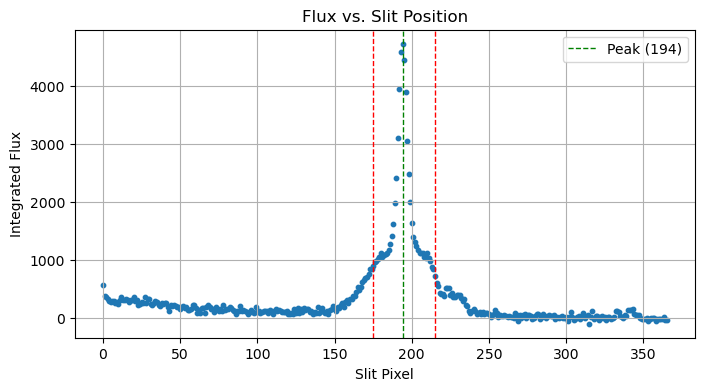

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


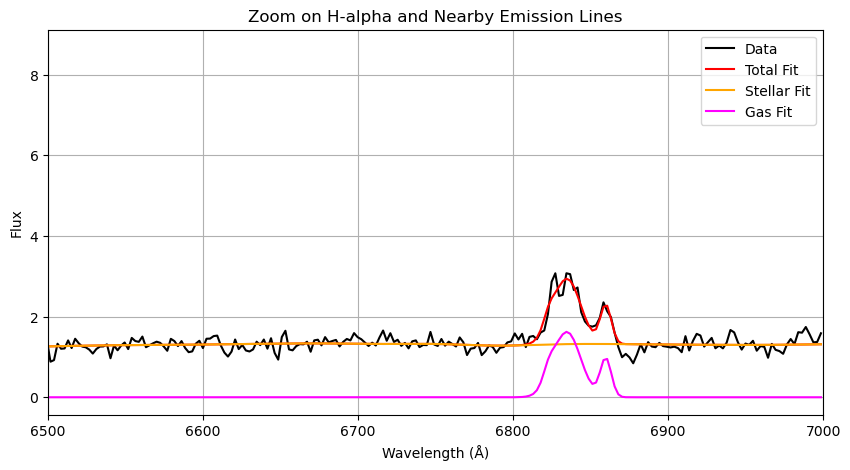

σ (km/s): 369.95

Window centre: 178


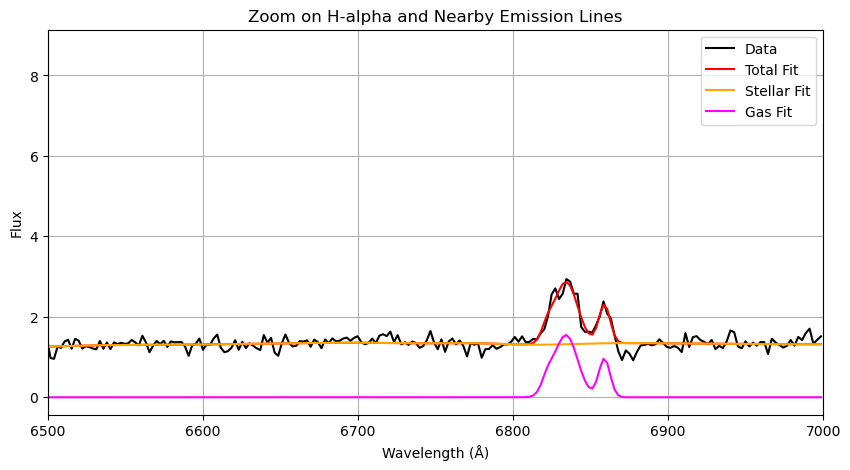

σ (km/s): 311.30

Window centre: 179


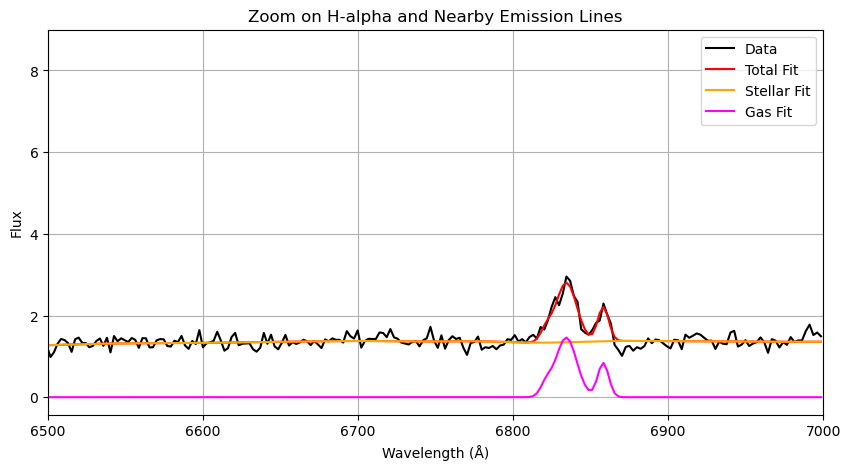

σ (km/s): 275.06

Window centre: 180


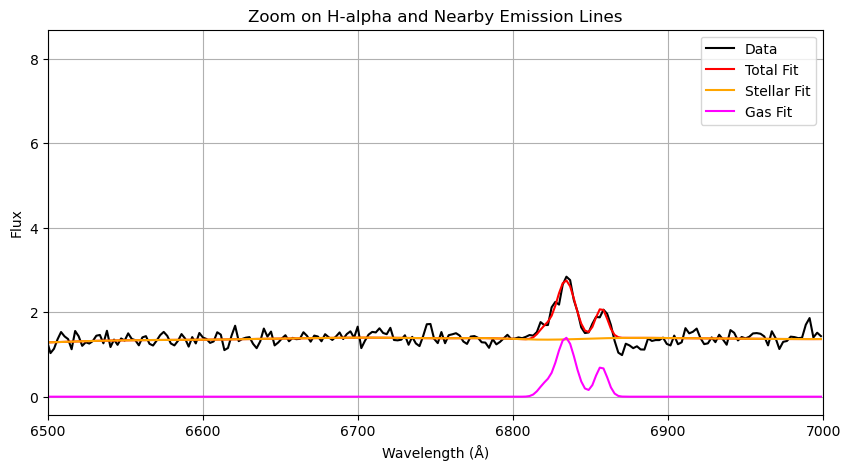

σ (km/s): 241.67

Window centre: 181


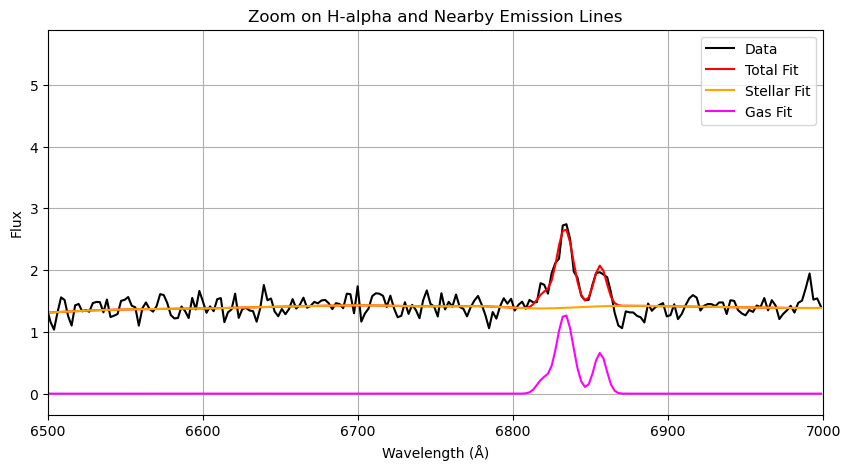

σ (km/s): 209.10

Window centre: 182


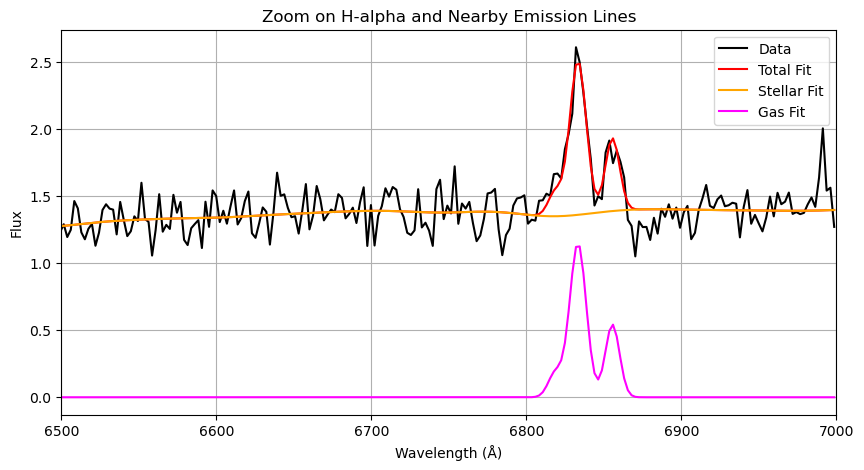

σ (km/s): 206.98

Window centre: 183


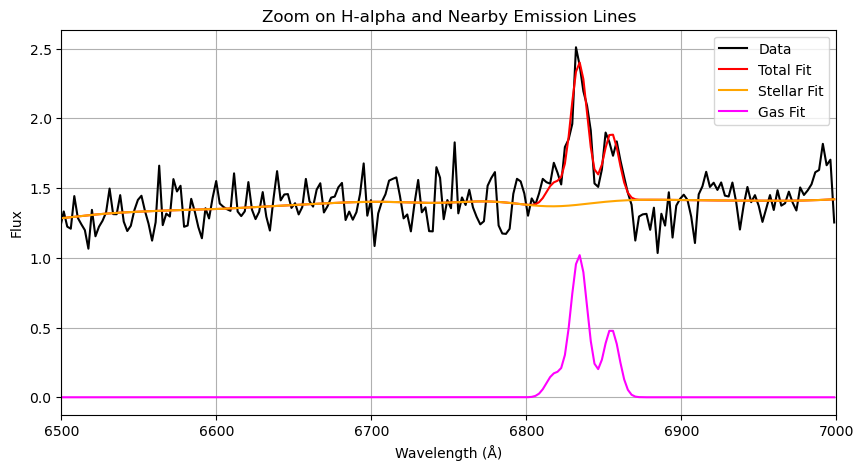

σ (km/s): 209.39

Window centre: 184


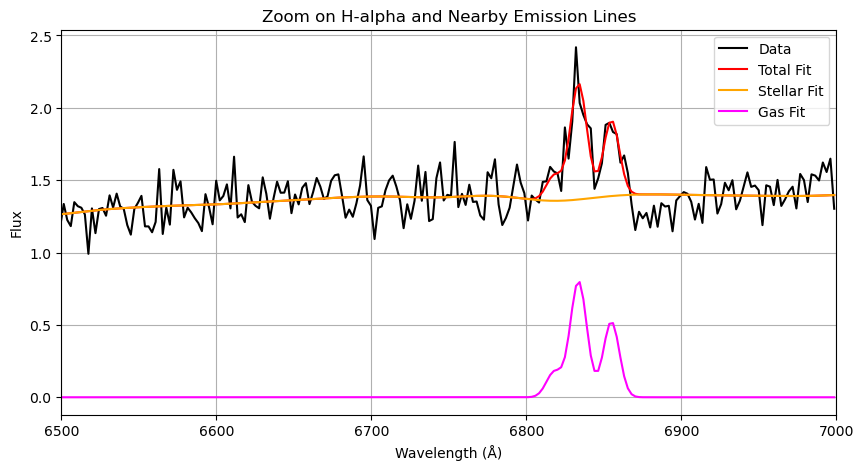

σ (km/s): 207.25

Window centre: 185


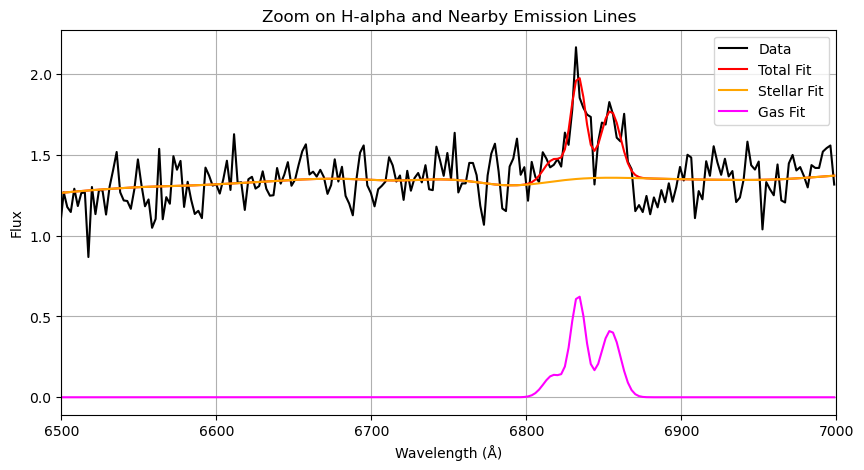

σ (km/s): 177.33

Window centre: 186


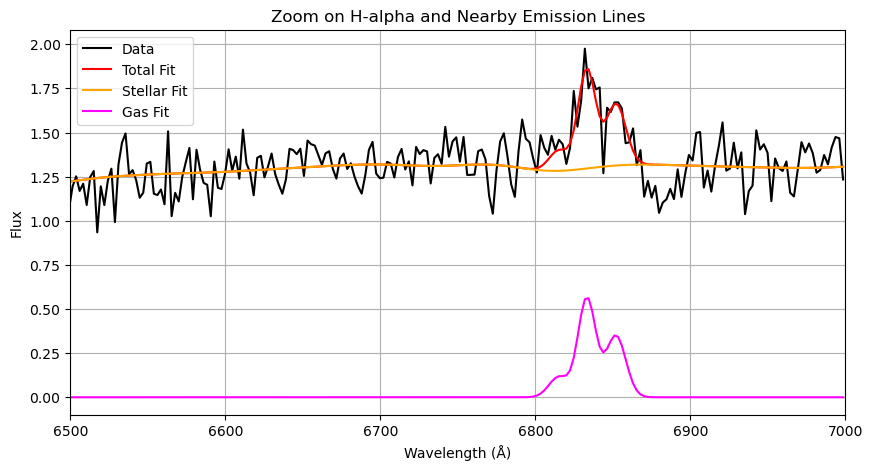

σ (km/s): 223.96

Window centre: 187


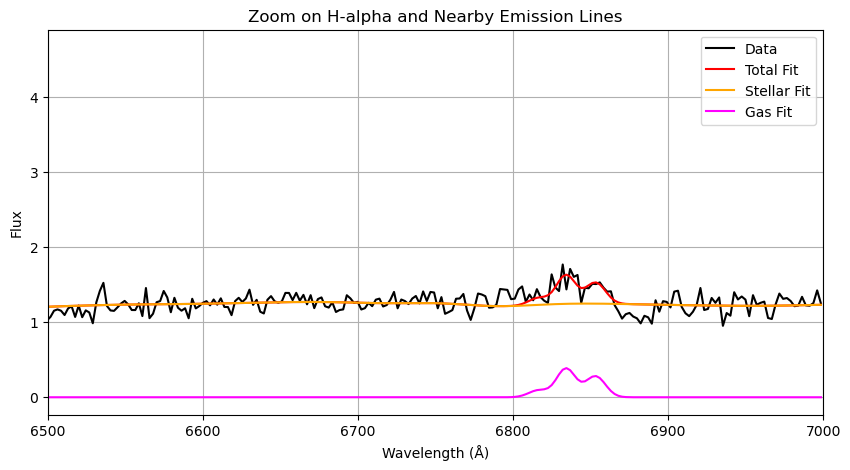

σ (km/s): 247.75

Window centre: 188


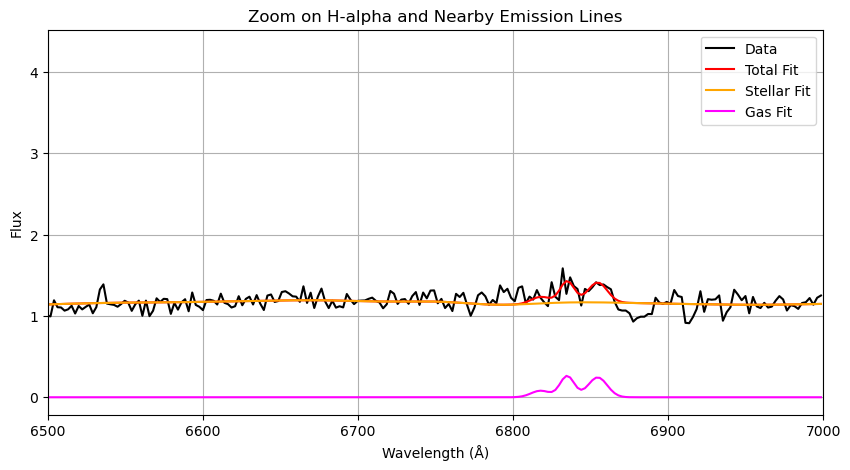

σ (km/s): 168.62

Window centre: 189


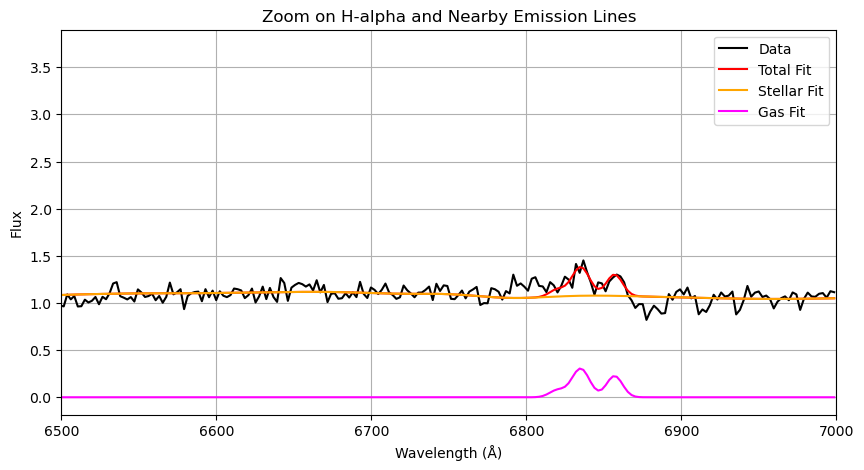

σ (km/s): 225.65

Window centre: 190


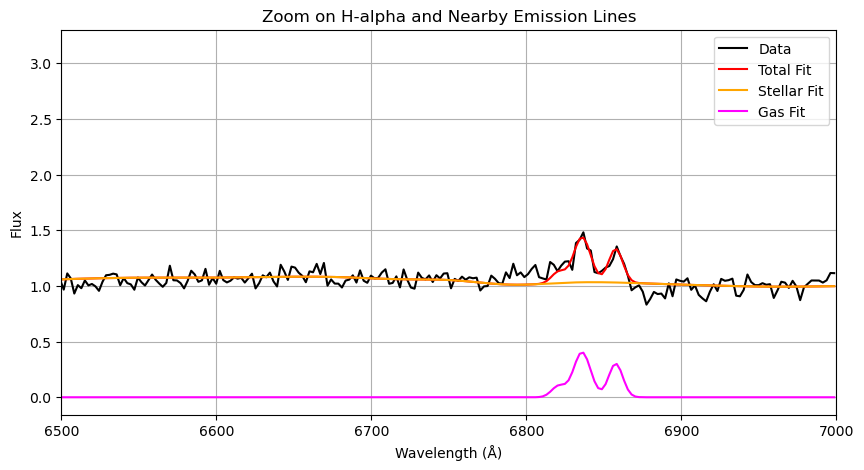

σ (km/s): 214.84

Window centre: 191


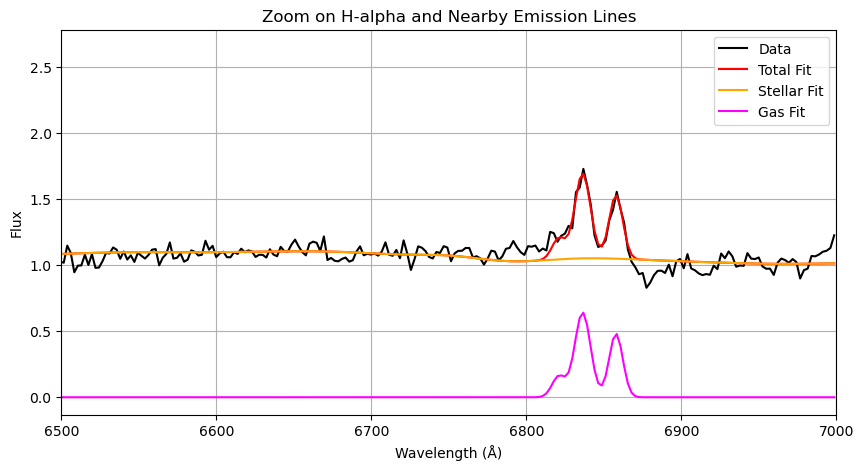

σ (km/s): 193.66

Window centre: 192


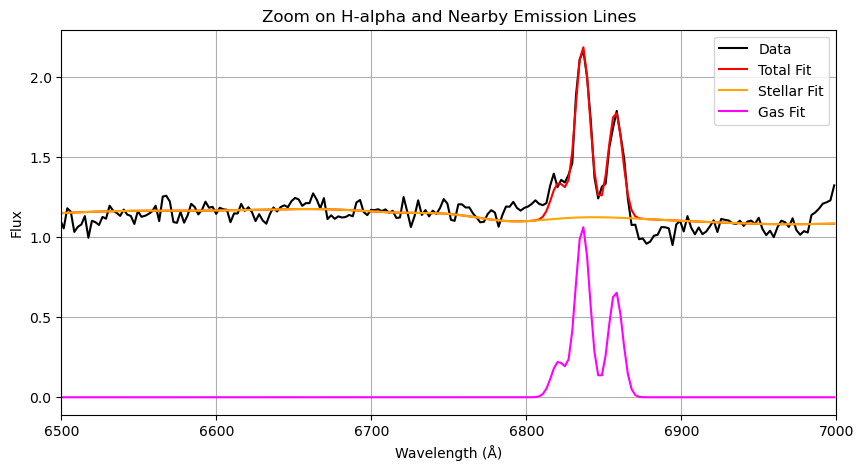

σ (km/s): 171.38

Window centre: 193


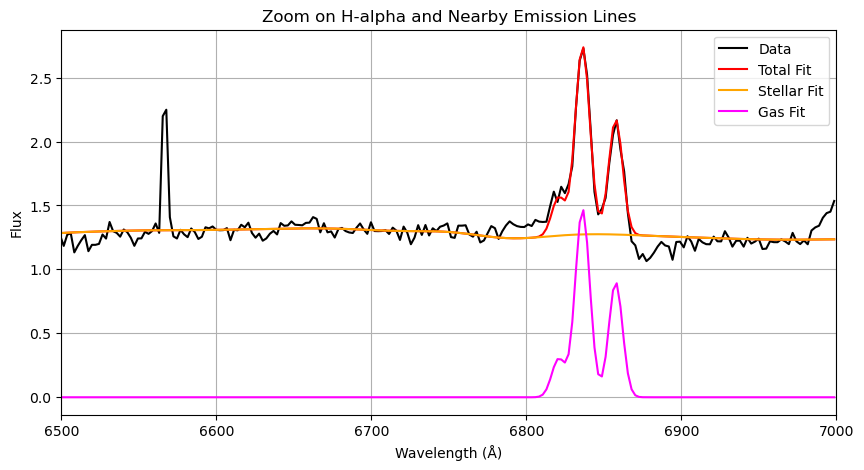

σ (km/s): 174.04

Window centre: 194


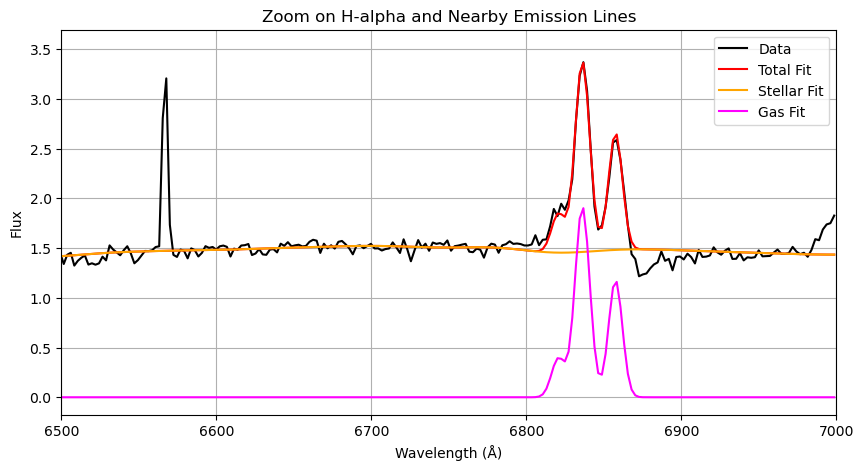

σ (km/s): 176.83

Window centre: 195


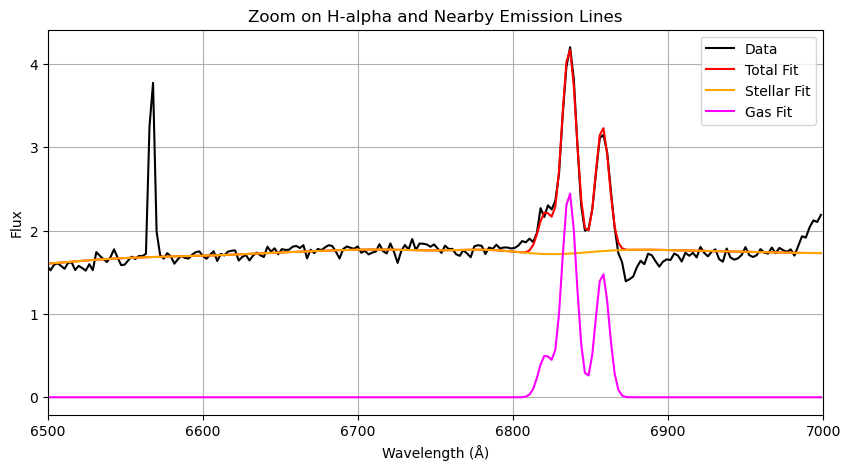

σ (km/s): 174.57

Window centre: 196


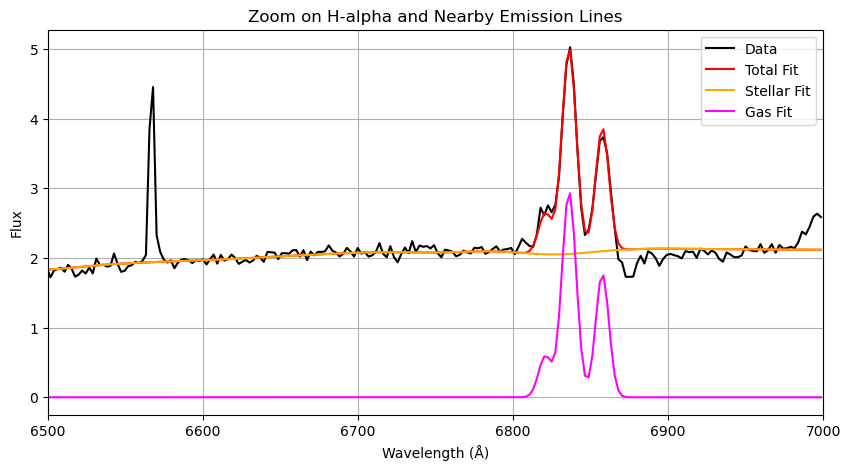

σ (km/s): 169.19

Window centre: 197


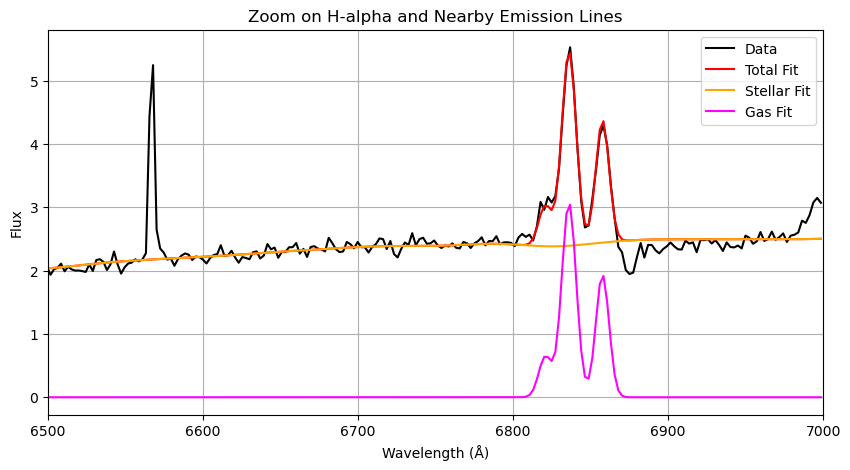

σ (km/s): 171.59

Window centre: 198


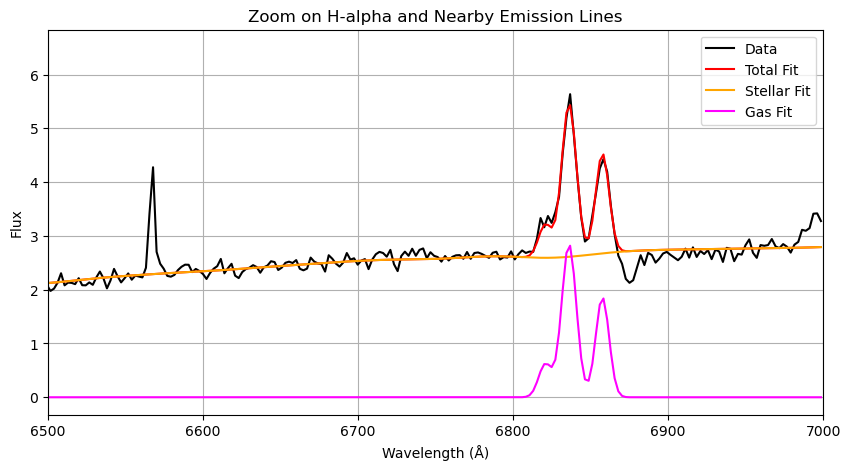

σ (km/s): 176.03

Window centre: 199


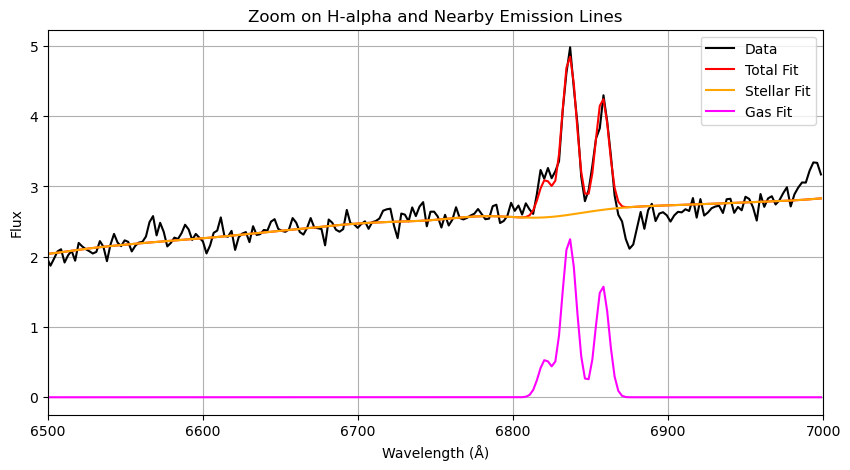

σ (km/s): 171.31

Window centre: 200


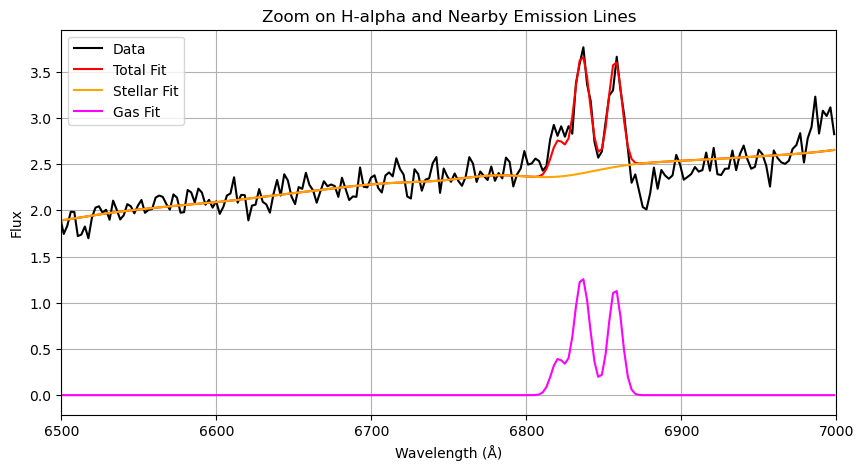

σ (km/s): 191.05

Window centre: 201


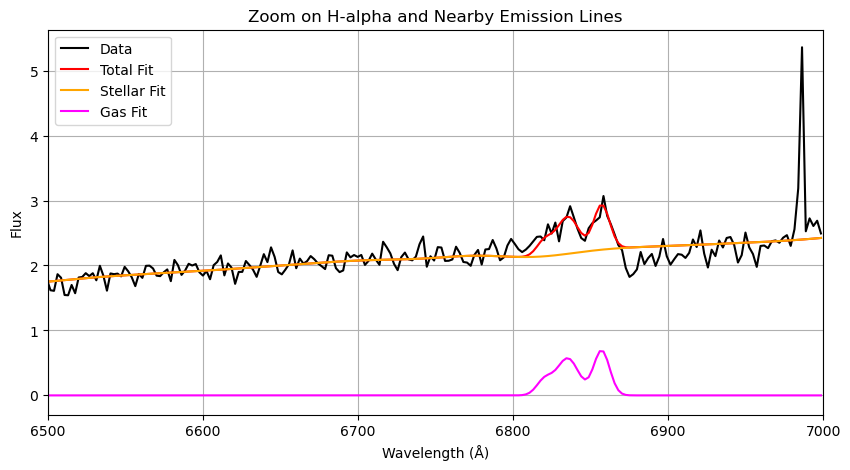

σ (km/s): 289.31

Window centre: 202


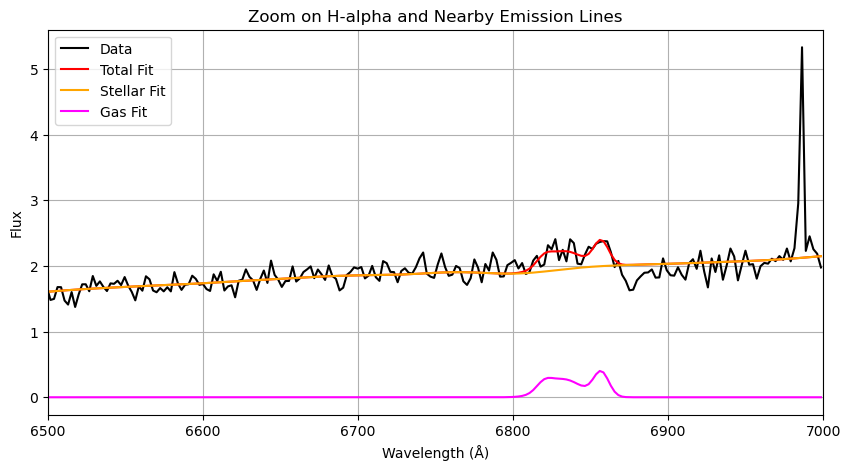

σ (km/s): 493.33

Window centre: 203


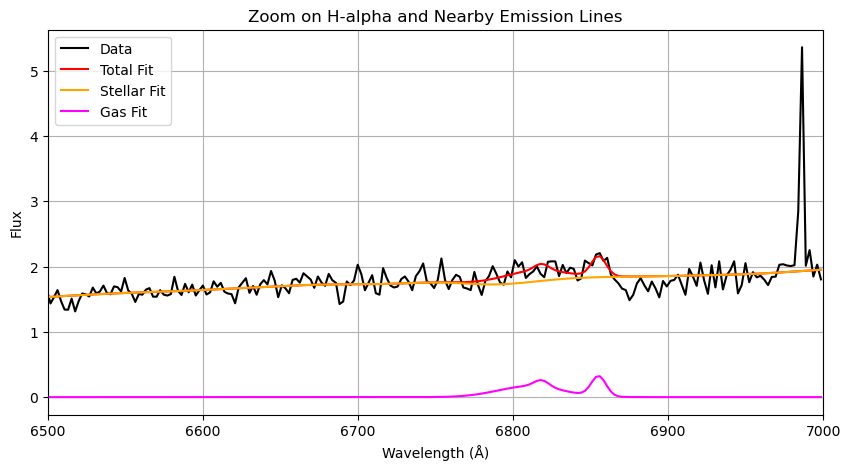

σ (km/s): 910.80

Window centre: 204


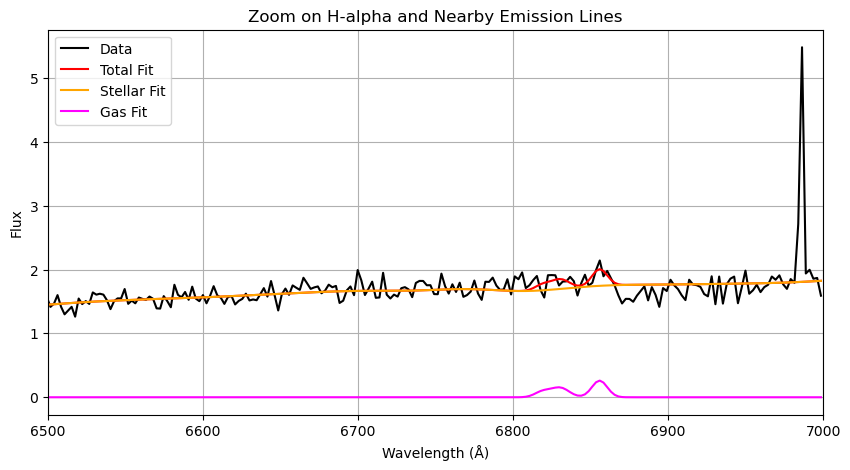

σ (km/s): 230.40

Window centre: 205


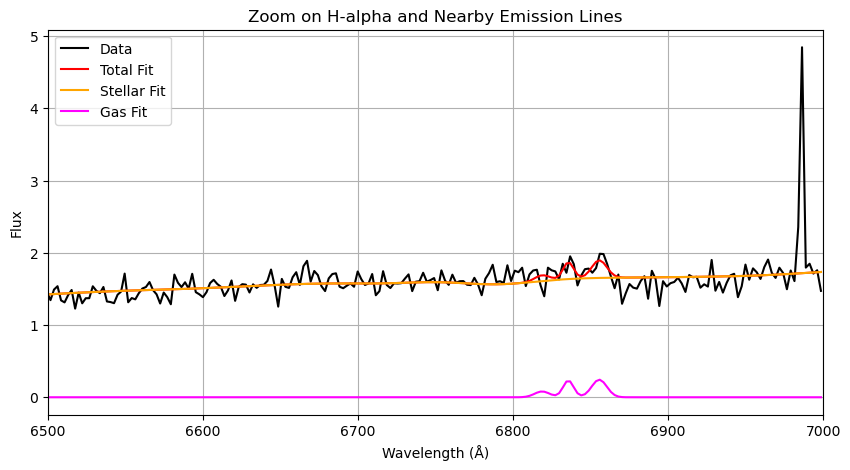

σ (km/s): 101.41

Window centre: 206


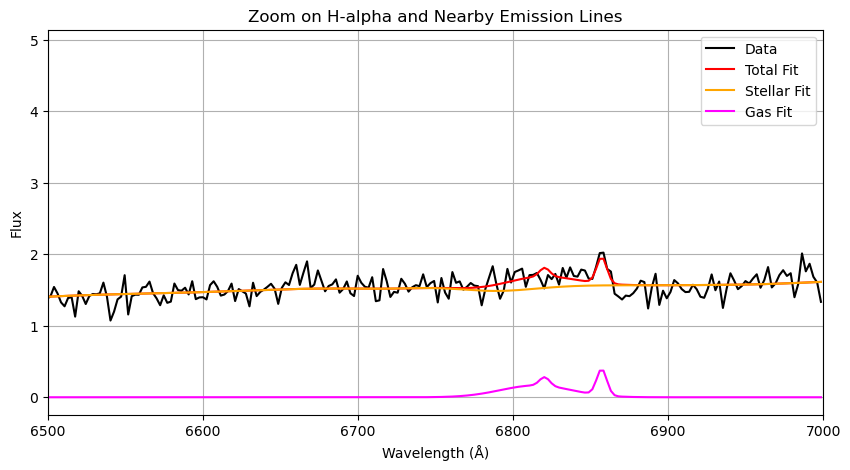

σ (km/s): 1000.00

Window centre: 207


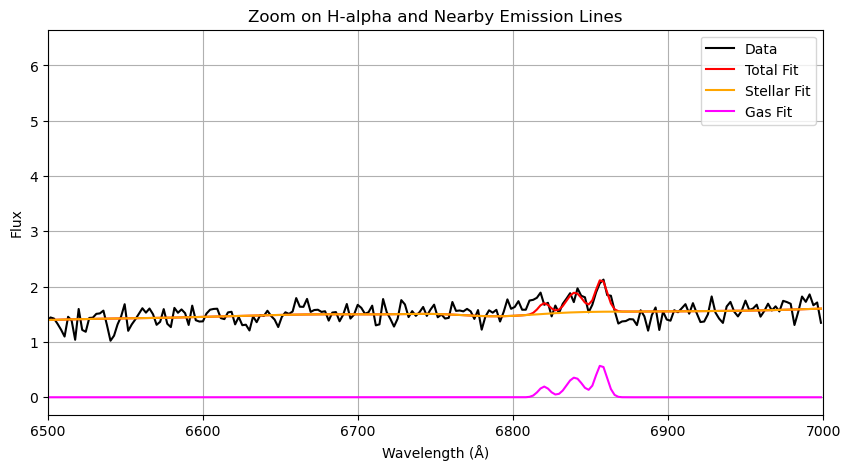

σ (km/s): 201.27

Window centre: 208


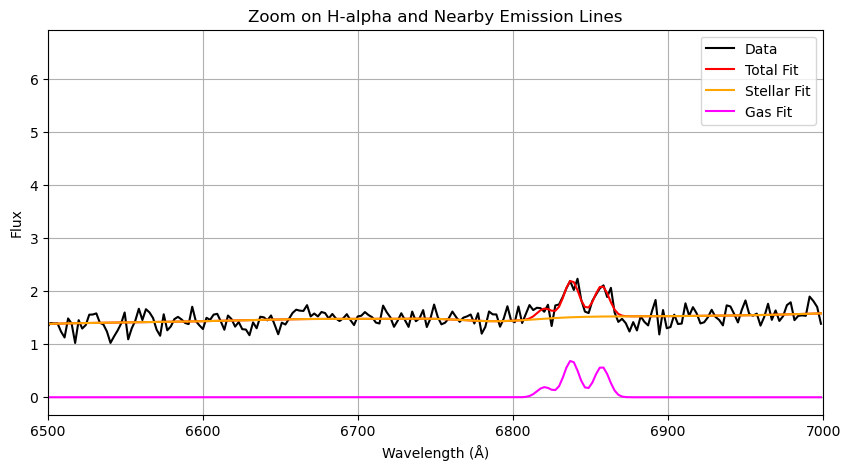

σ (km/s): 182.86

Window centre: 209


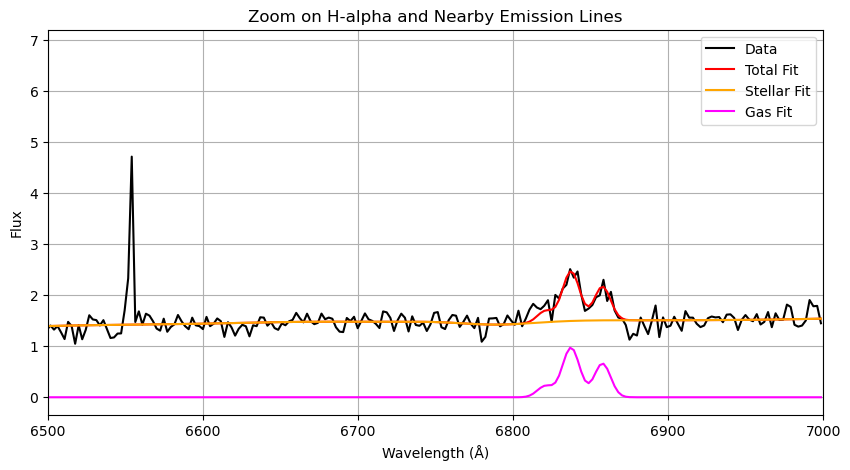

σ (km/s): 217.56

Window centre: 210


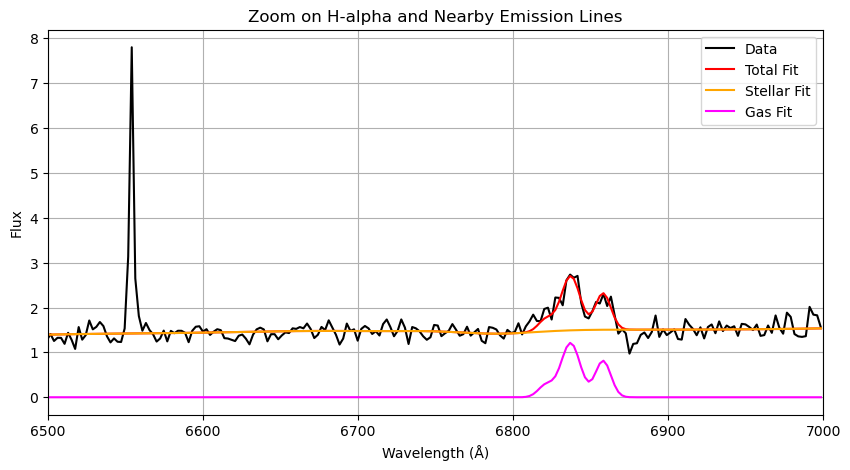

σ (km/s): 247.08

Window centre: 211


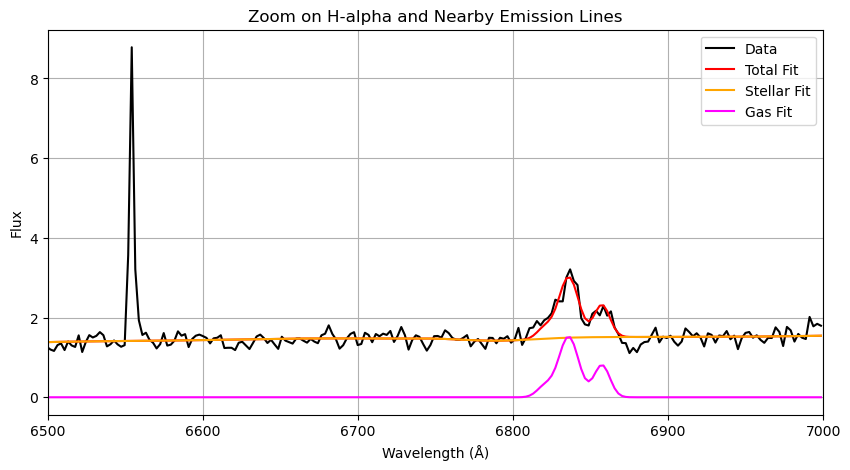

σ (km/s): 259.79

Window centre: 212


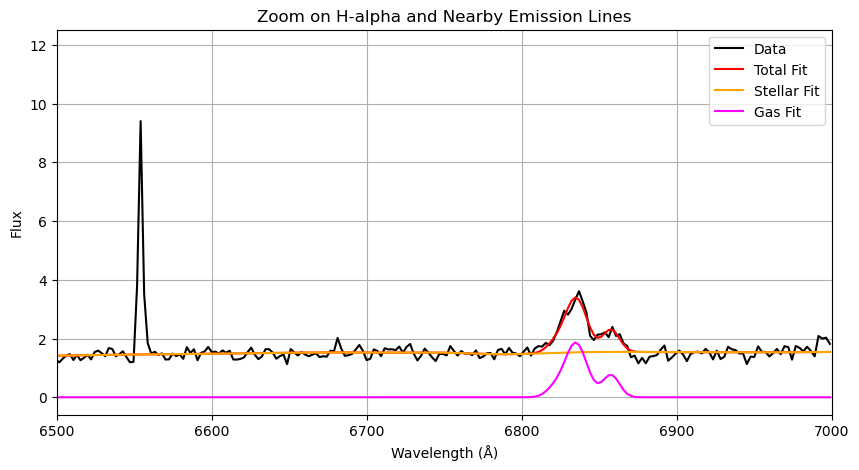

σ (km/s): 294.86

Window centre: 213


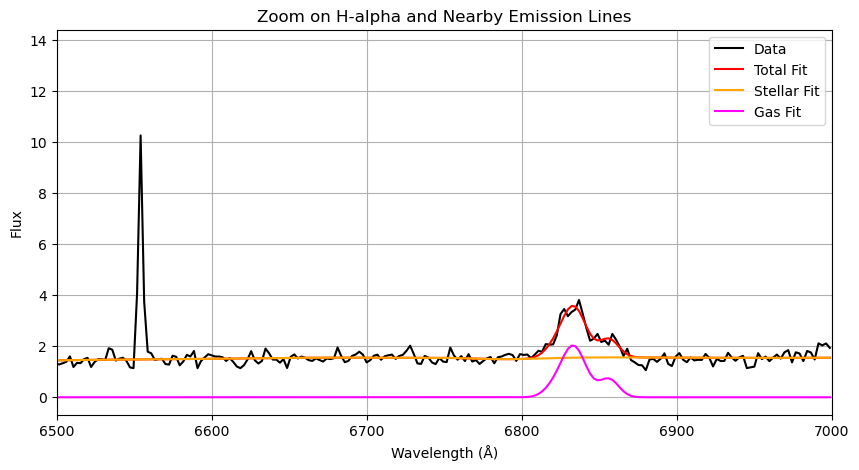

σ (km/s): 336.10

Window centre: 214


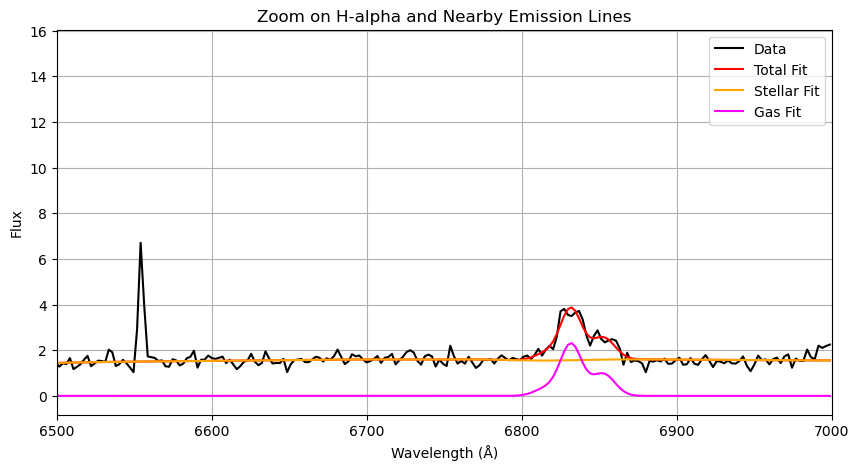

σ (km/s): 284.38

Window centre: 215


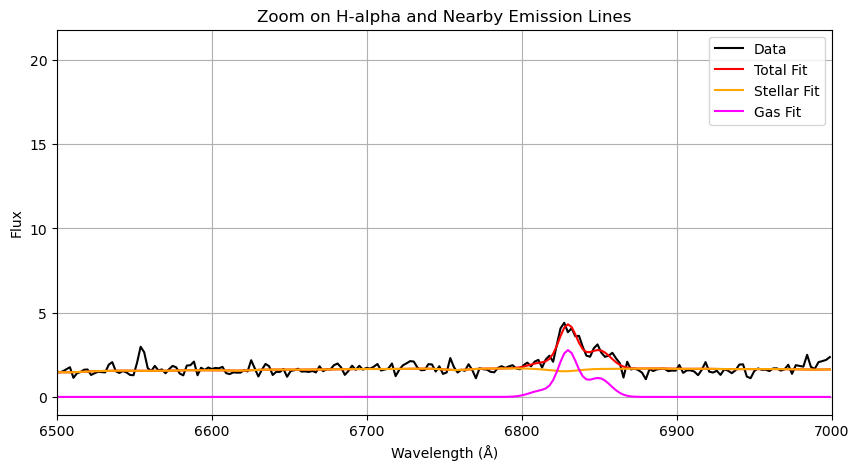

σ (km/s): 239.48

Window centre: 216


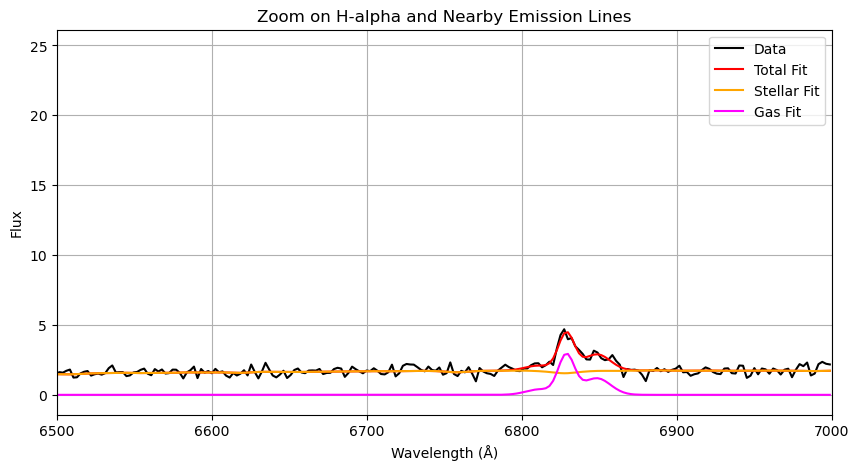

σ (km/s): 202.09

Window centre: 217


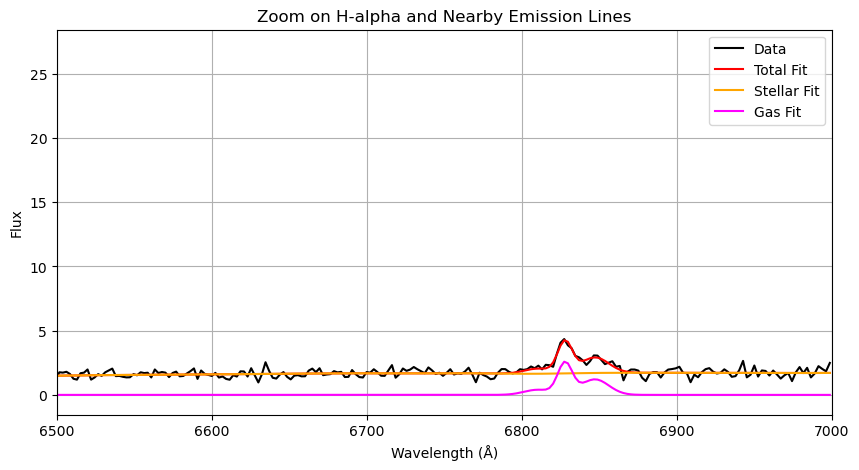

σ (km/s): 174.33

Window centre: 218


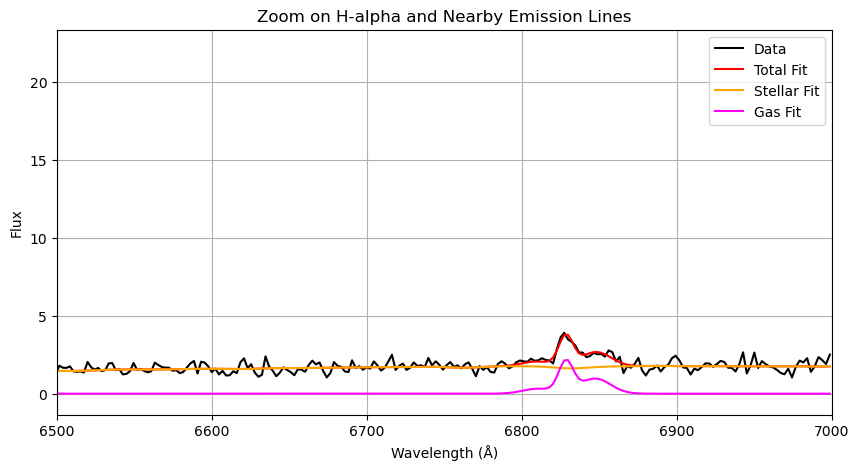

σ (km/s): 173.85

Window centre: 219


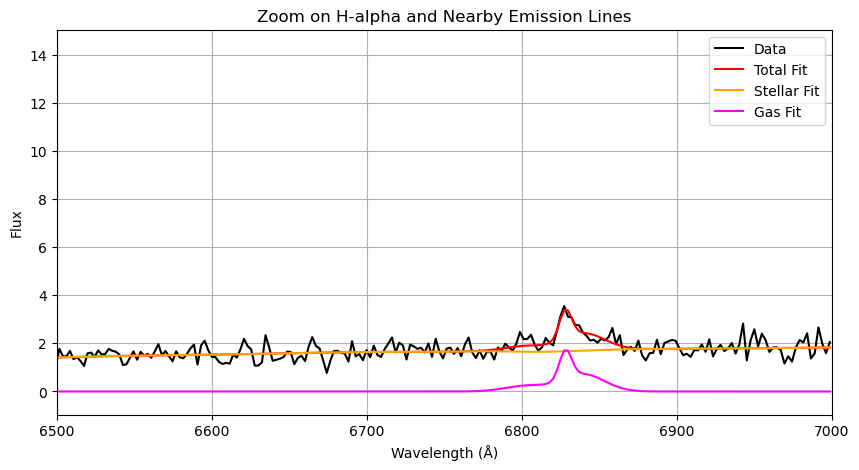

σ (km/s): 134.34

Window centre: 220


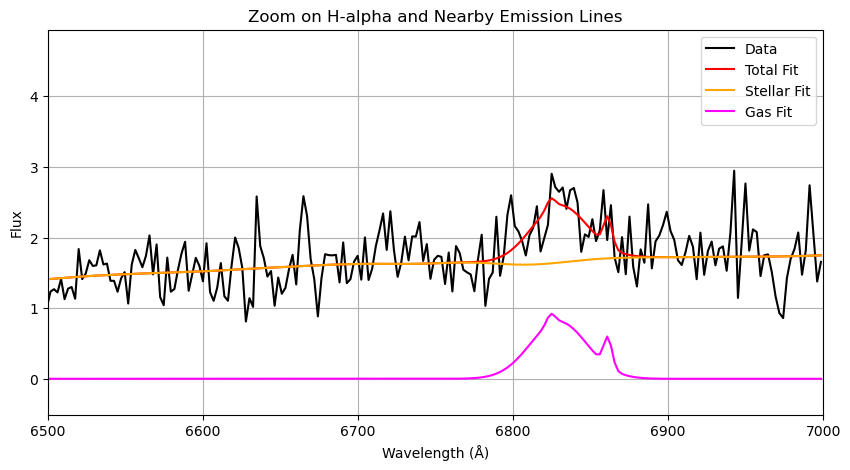

σ (km/s): 798.11

Window centre: 221


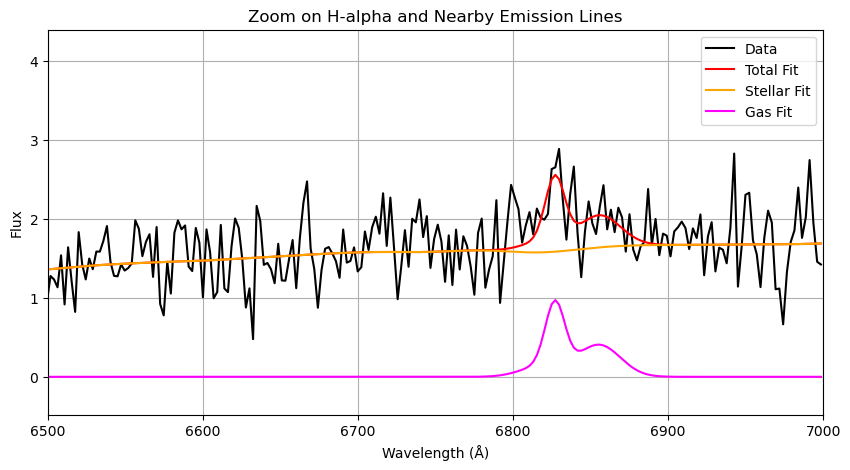

σ (km/s): 251.25

Window centre: 222


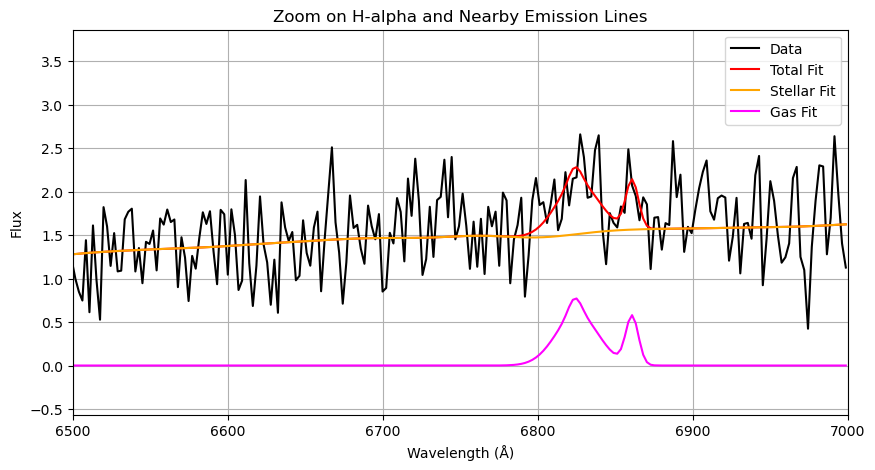

σ (km/s): 594.00

Window centre: 223


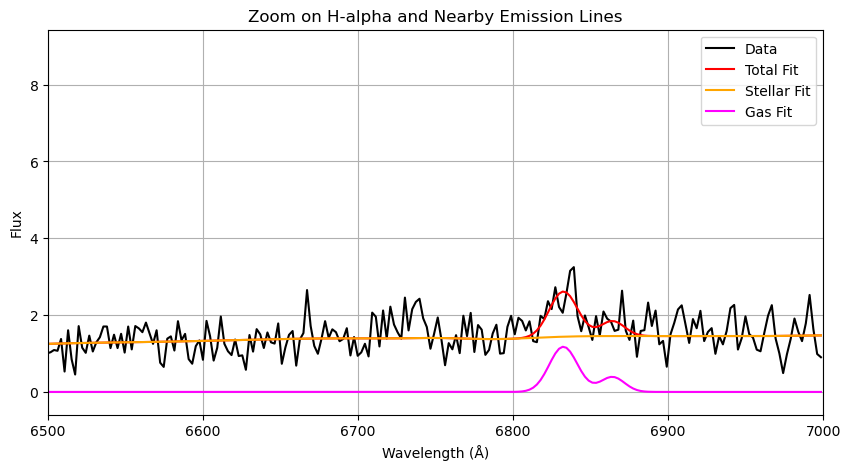

σ (km/s): 378.40

Window centre: 224


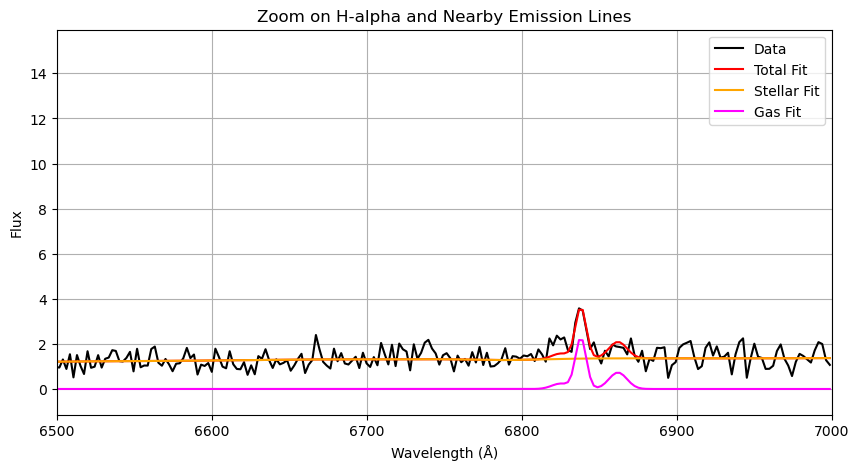

σ (km/s): 105.55

Window centre: 225


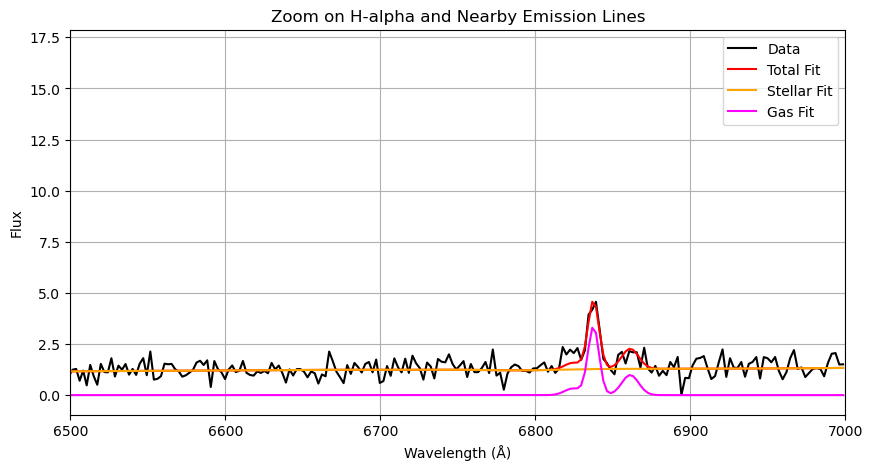

σ (km/s): 111.05

Window centre: 226


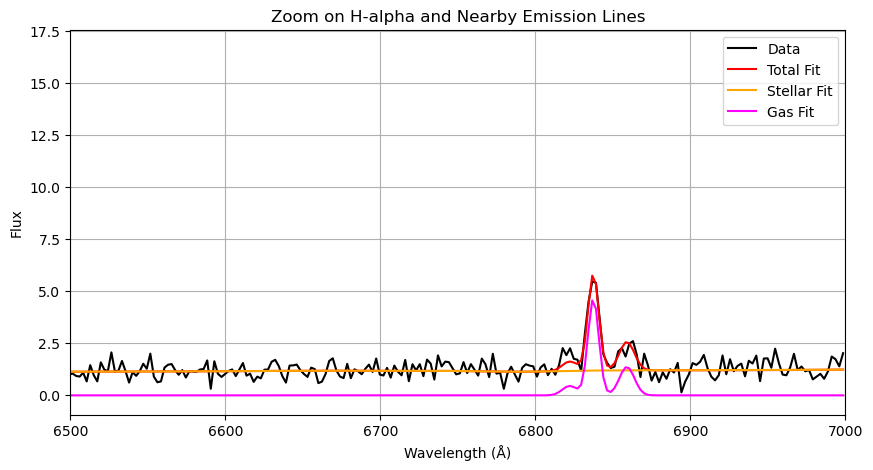

σ (km/s): 107.25

Window centre: 227


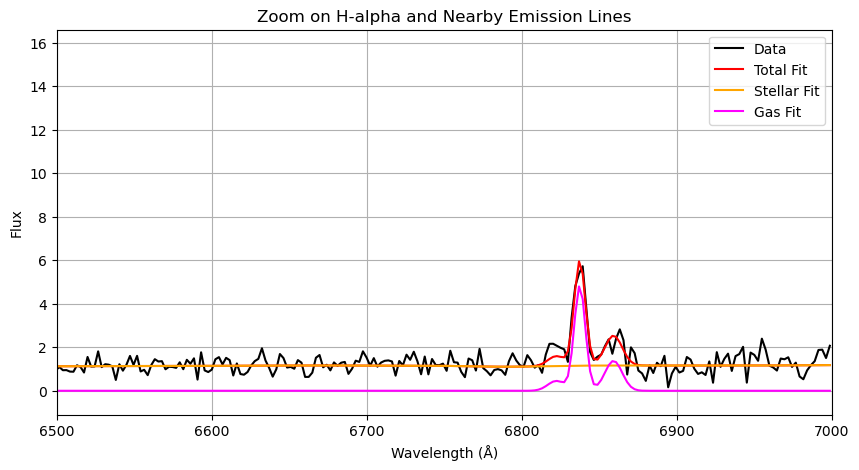

σ (km/s): 112.03

Window centre: 228


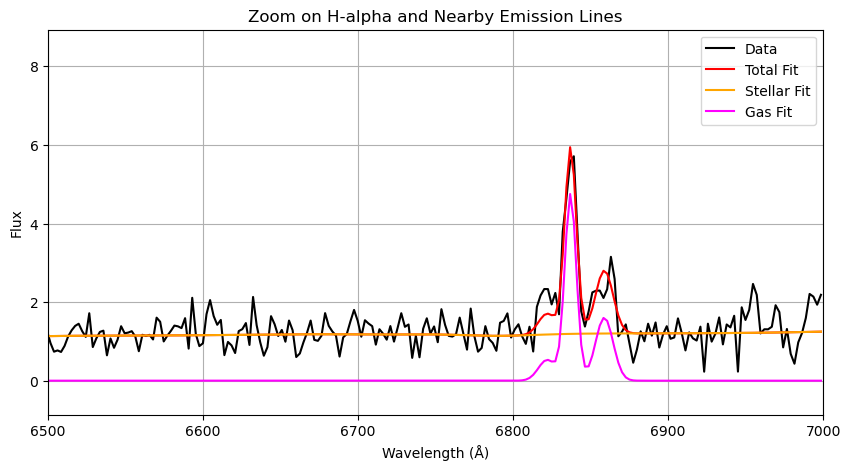

σ (km/s): 120.99

Window centre: 229


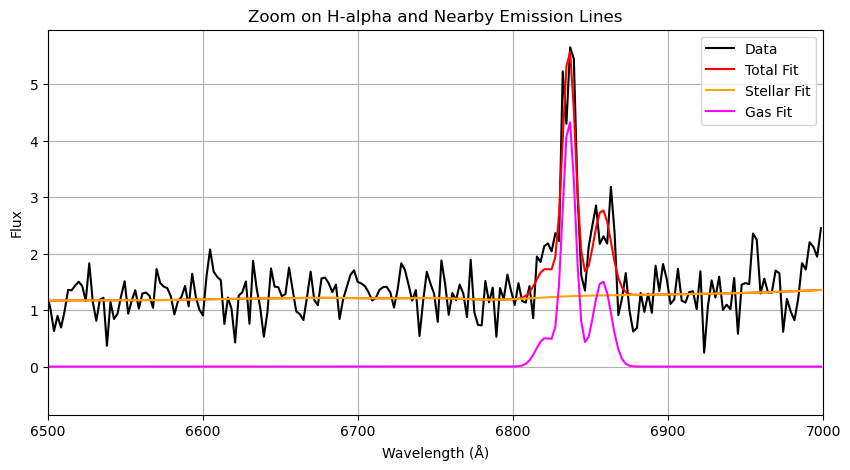

σ (km/s): 143.53

Window centre: 230


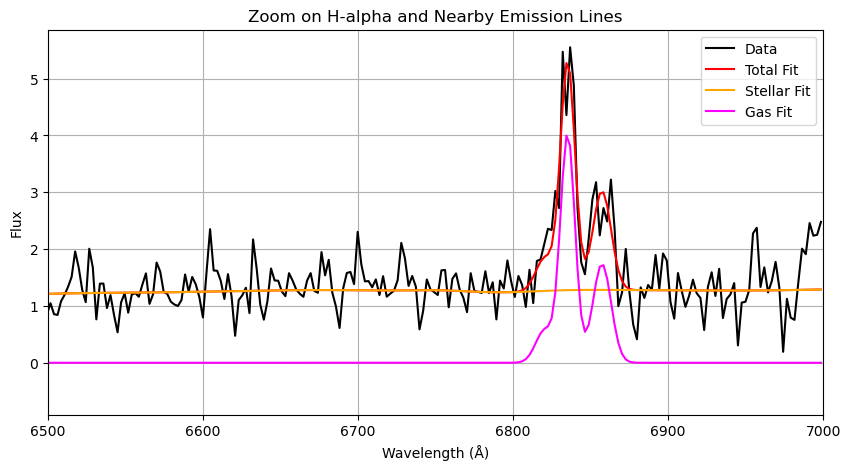

σ (km/s): 173.38

Window centre: 231


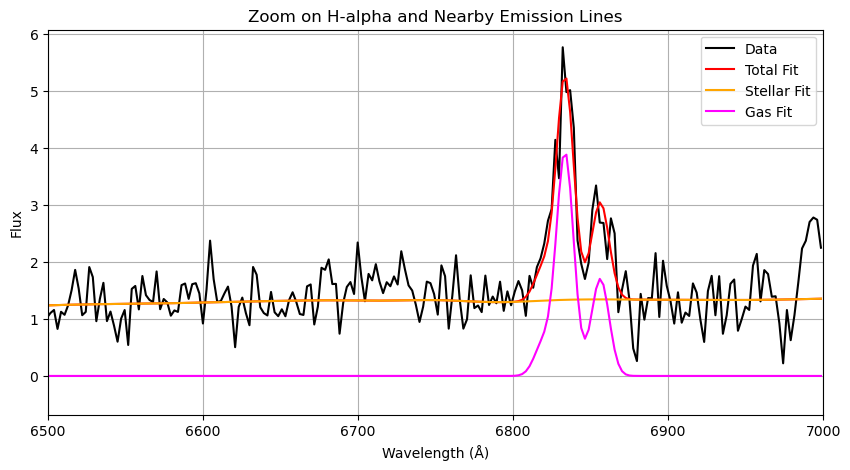

σ (km/s): 218.38

Window centre: 232


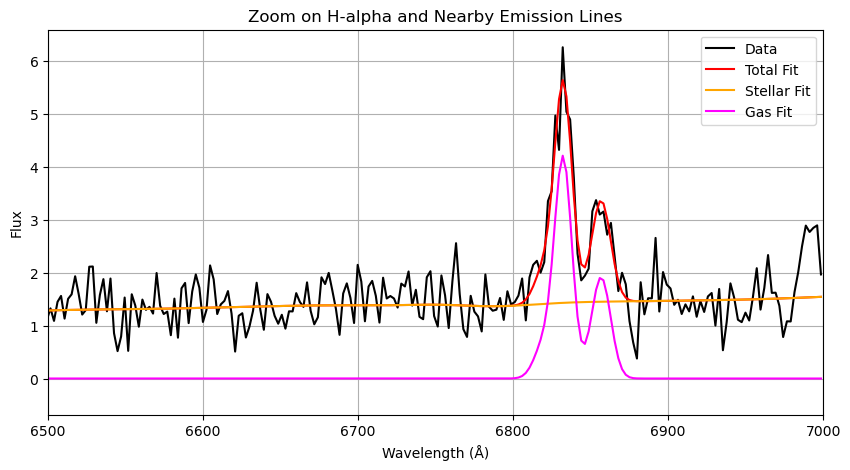

σ (km/s): 220.47

Window centre: 233


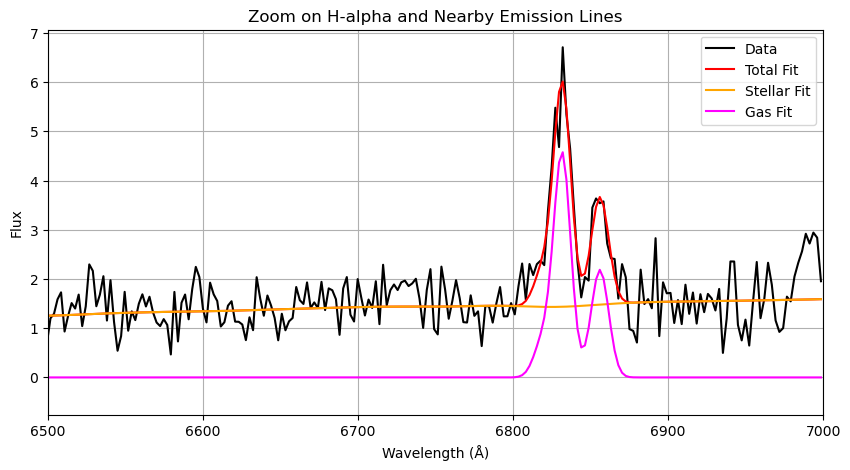

σ (km/s): 215.24

Window centre: 234


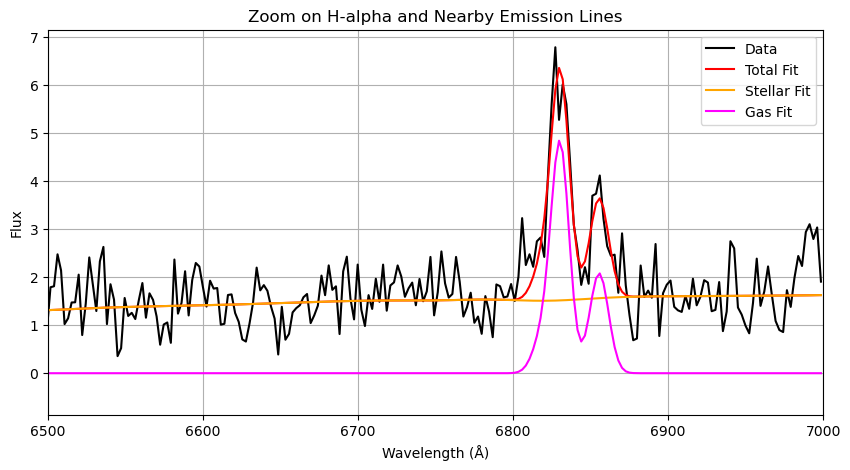

σ (km/s): 232.53

Window centre: 235


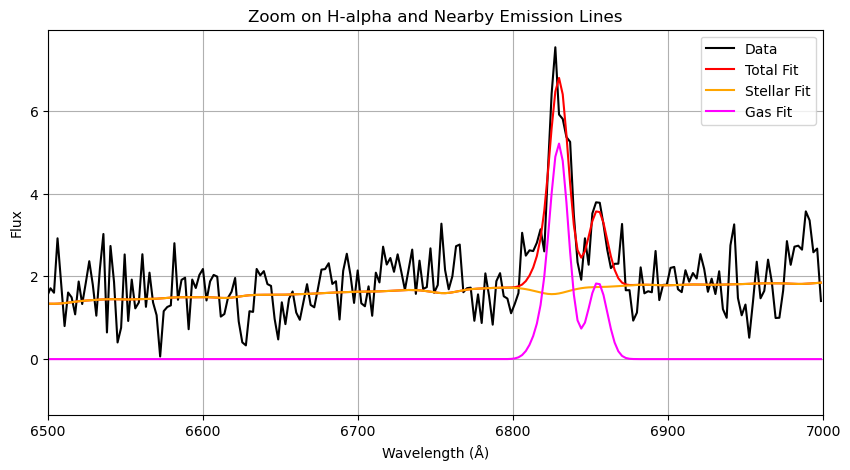

σ (km/s): 239.67

Window centre: 236


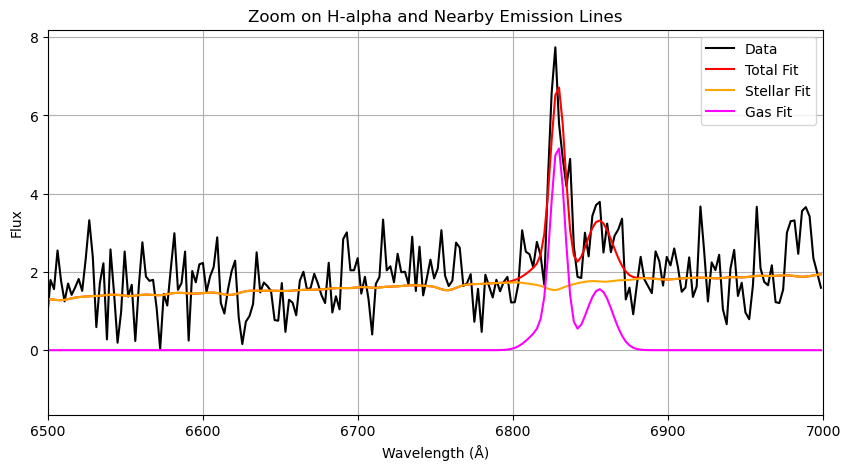

σ (km/s): 173.79

Window centre: 237


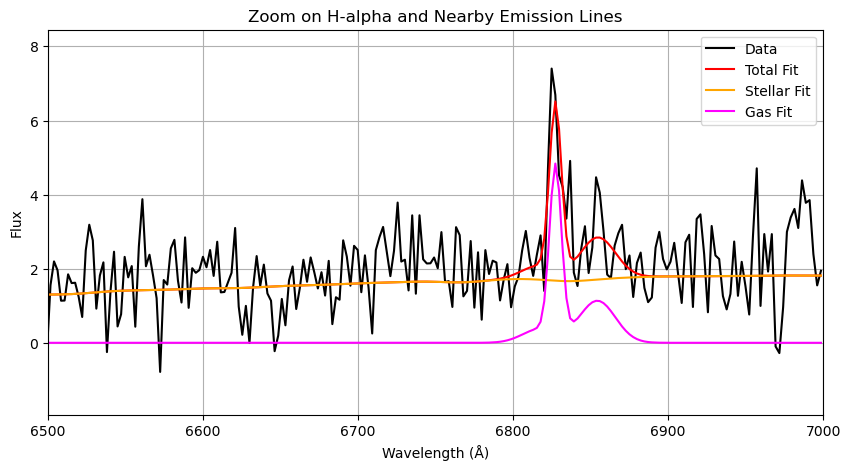

σ (km/s): 126.74

Window centre: 238


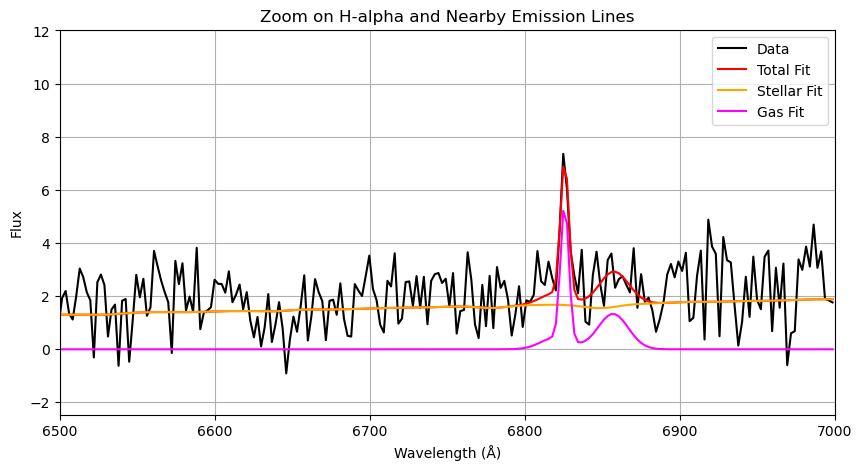

σ (km/s): 38.94

Window centre: 239


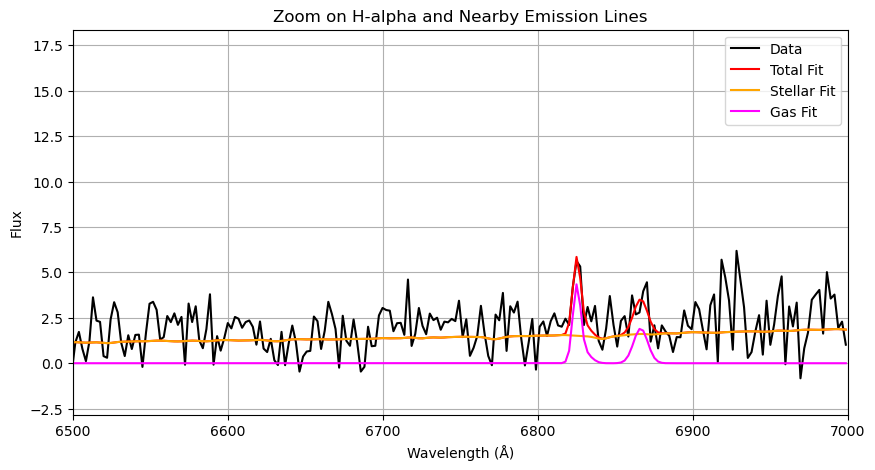

σ (km/s): 1.05

Window centre: 240


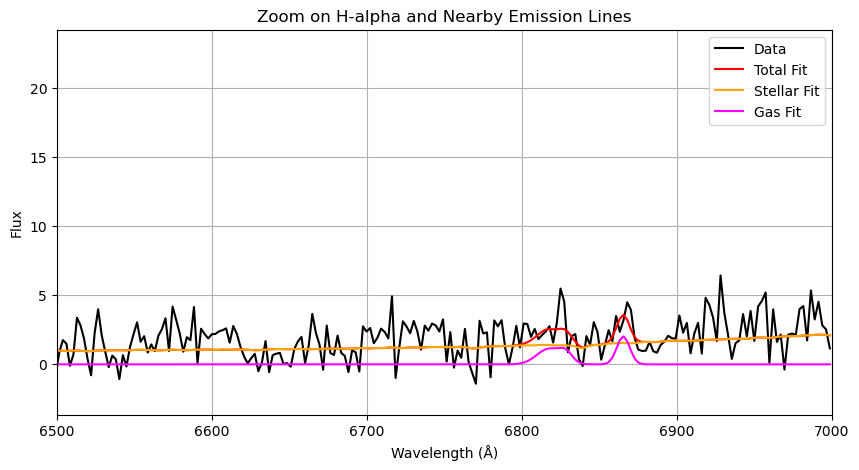

σ (km/s): 329.47

Window centre: 241


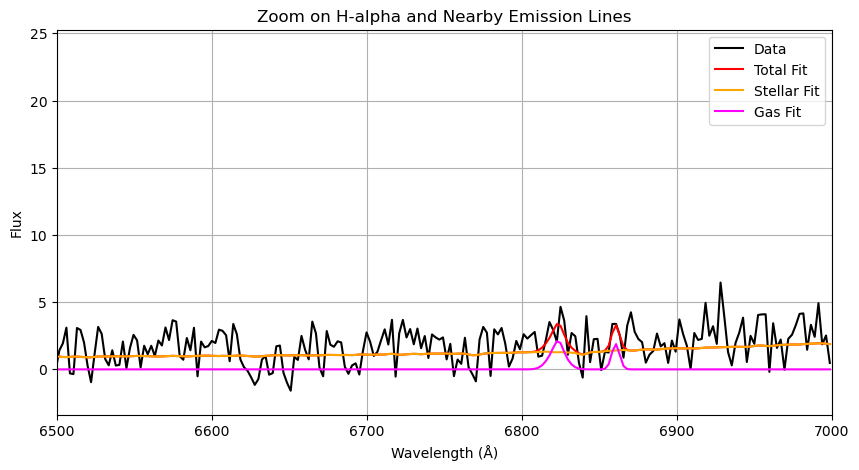

σ (km/s): 213.39

Window centre: 242


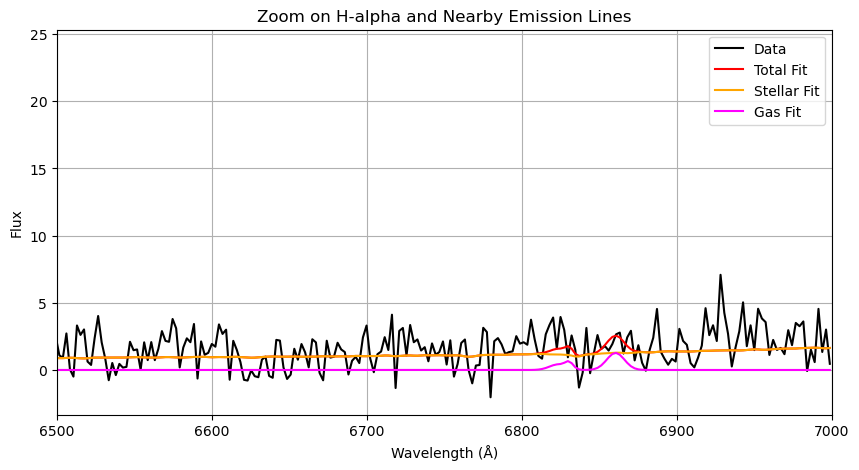

σ (km/s): 1.05

Window centre: 243


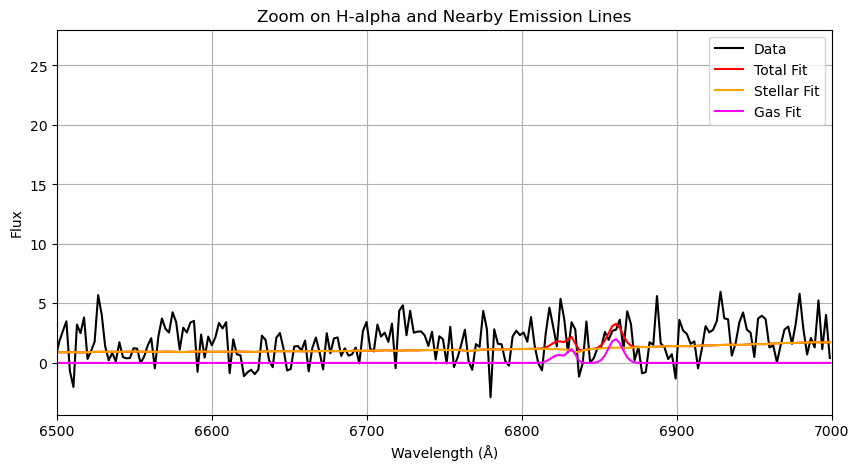

σ (km/s): 1.05

Window centre: 244


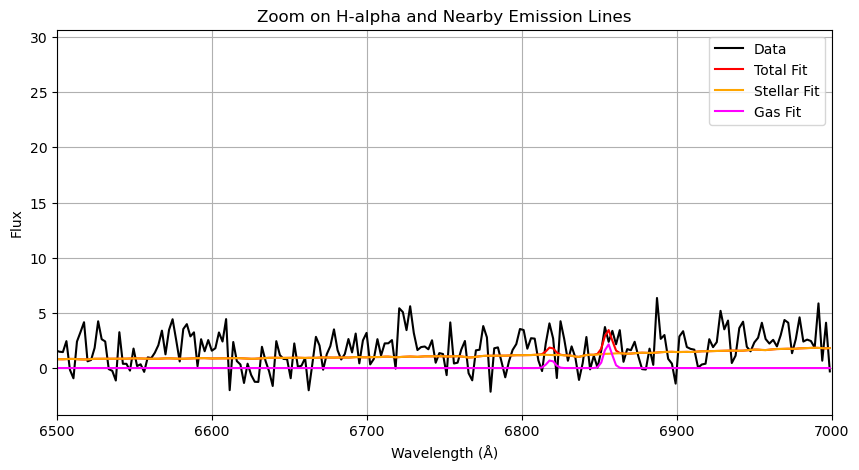

σ (km/s): 120.00

Window centre: 245


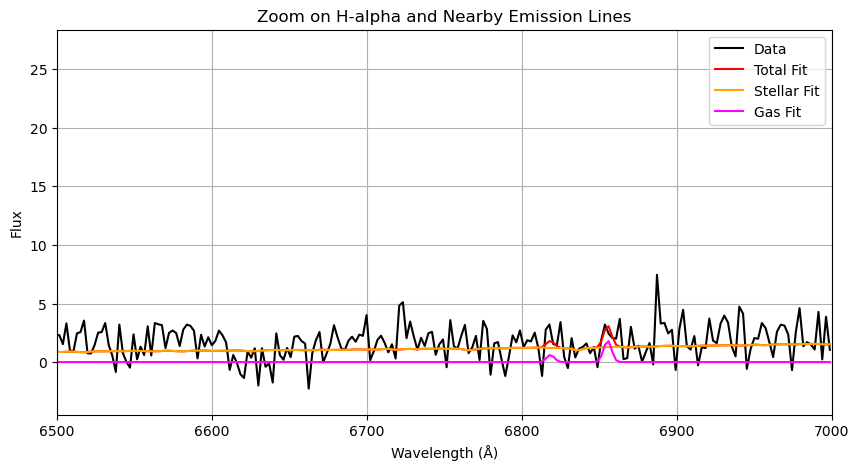

σ (km/s): 120.00

Window centre: 246


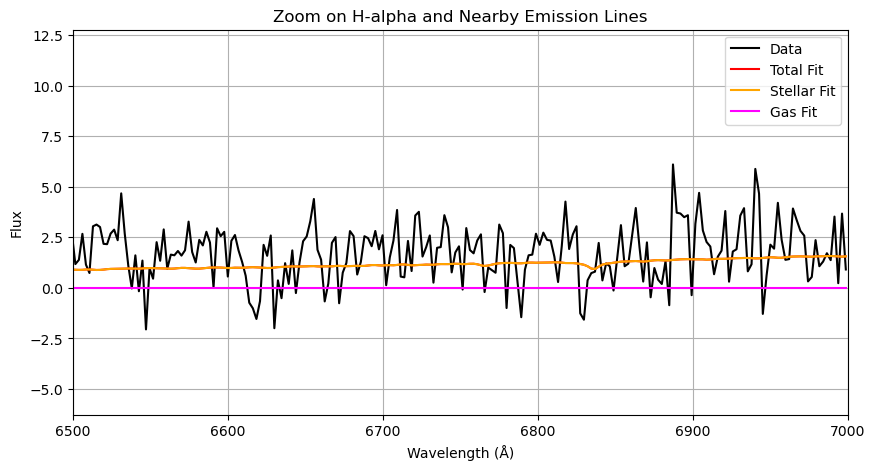

σ (km/s): 120.00

Window centre: 247


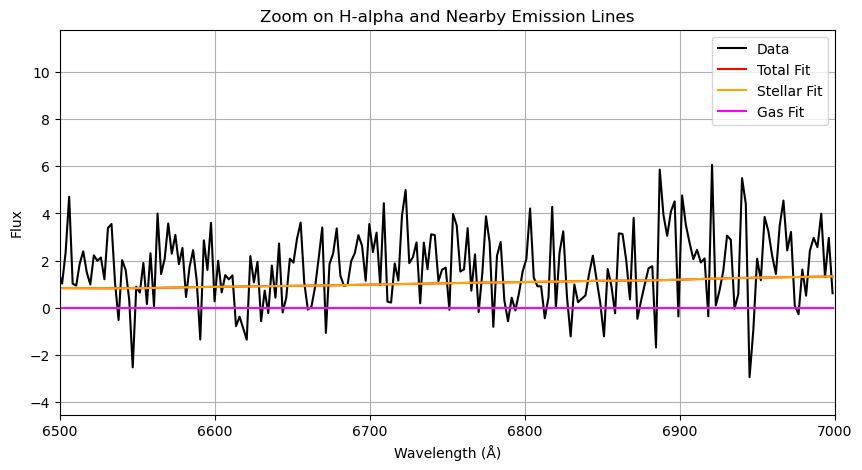

σ (km/s): 120.00



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)


    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_8804/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_8804/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_8804/3518839896.py:26: RuntimeWarning: invalid value encountered in scalar divide
  EW        = flux_ha / cont0


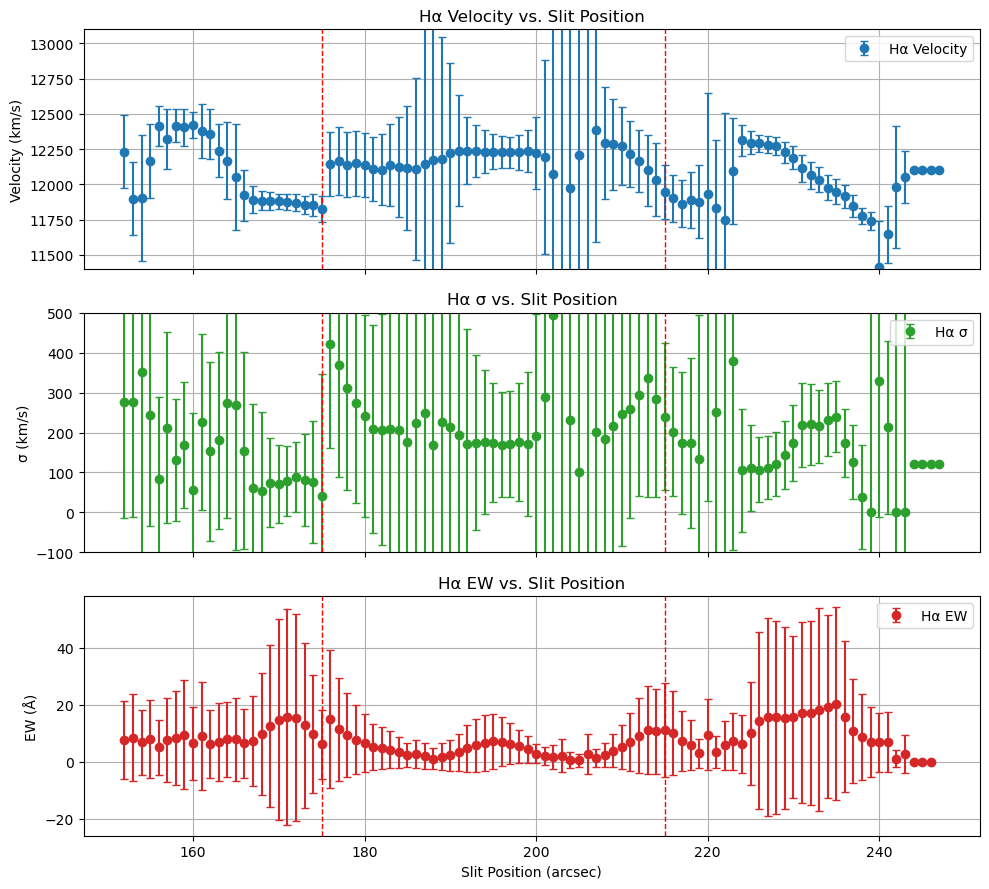

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylim(11400,13100)
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/SB3_halpha_results_Z.csv', index=False)


In [8]:
blue = "#0072B2" 
red = "#D73027" 
orange = "#cc5500"

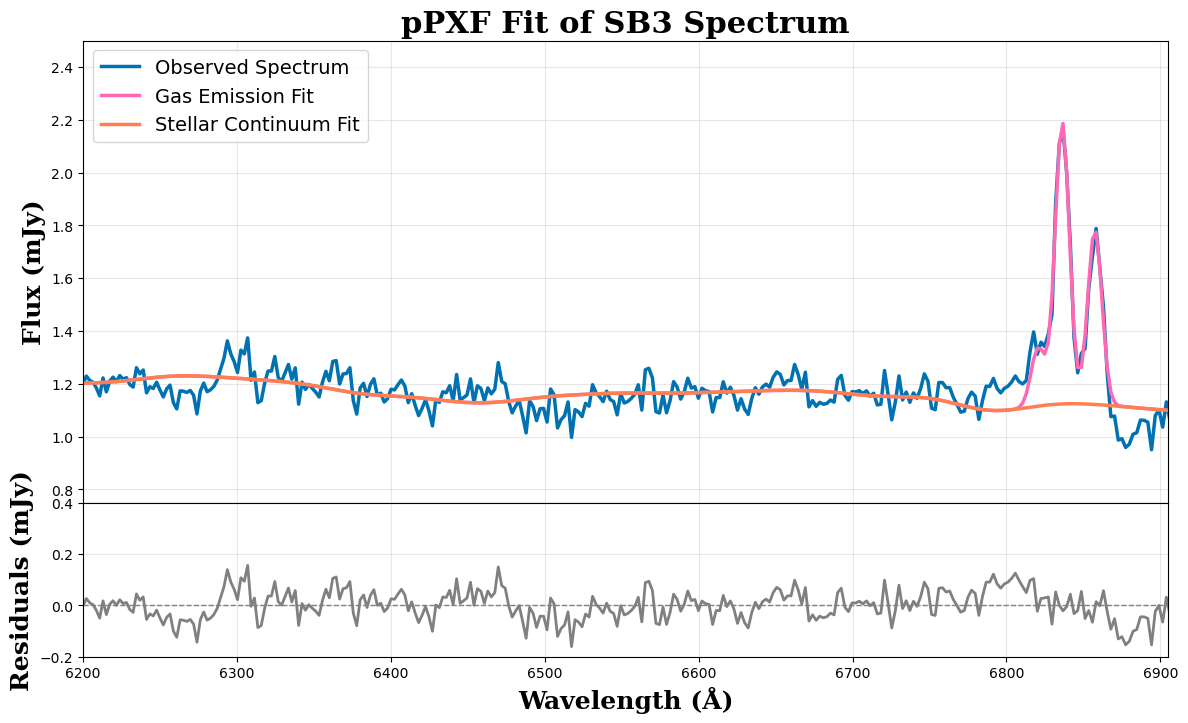

In [9]:
# New color palette

center, df_rb, pp = results[40]
lam   = df_rb["lam"].values
flux  = df_rb["flux"].values

stellar_model = pp.bestfit - pp.gas_bestfit
gas_model     = pp.gas_bestfit
residuals     = flux - (stellar_model + gas_model)

fig, axs = plt.subplots(
    2, 1, figsize=(14, 8), sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# --- Top panel: spectra + fits ---
axs[0].plot(lam, flux, lw=2.5, label="Observed Spectrum", color=blue)
axs[0].plot(lam, gas_model + stellar_model, lw=2.5, label="Gas Emission Fit", color='hotpink')
axs[0].plot(lam, stellar_model, lw=2.5, label="Stellar Continuum Fit", color='coral')

axs[0].set_xlim(6200, 6905)
axs[0].set_ylim(0.75, 2.5)

axs[0].set_ylabel("Flux (mJy)", fontsize=18, fontweight="bold", family="serif")
axs[0].set_title("pPXF Fit of SB3 Spectrum", fontsize=22, fontweight="bold", family="serif")
axs[0].grid(True, alpha=0.3)
axs[0].legend(fontsize=14)

# --- Bottom panel: residuals ---
axs[1].plot(lam, residuals, lw=2, color='grey')
axs[1].axhline(0, color='grey', ls='--', lw=1)

axs[1].set_ylim(-0.2, 0.4)
axs[1].set_xlabel("Wavelength (Å)", fontsize=18, fontweight="bold", family="serif")
axs[1].set_ylabel("Residuals (mJy)", fontsize=18, fontweight="bold", family="serif")
axs[1].grid(True, alpha=0.3)

# Make panels touch more closely
plt.subplots_adjust(hspace=0)

plt.savefig("ppxf_fit_with_residuals.png", dpi=300, bbox_inches="tight")
plt.show()


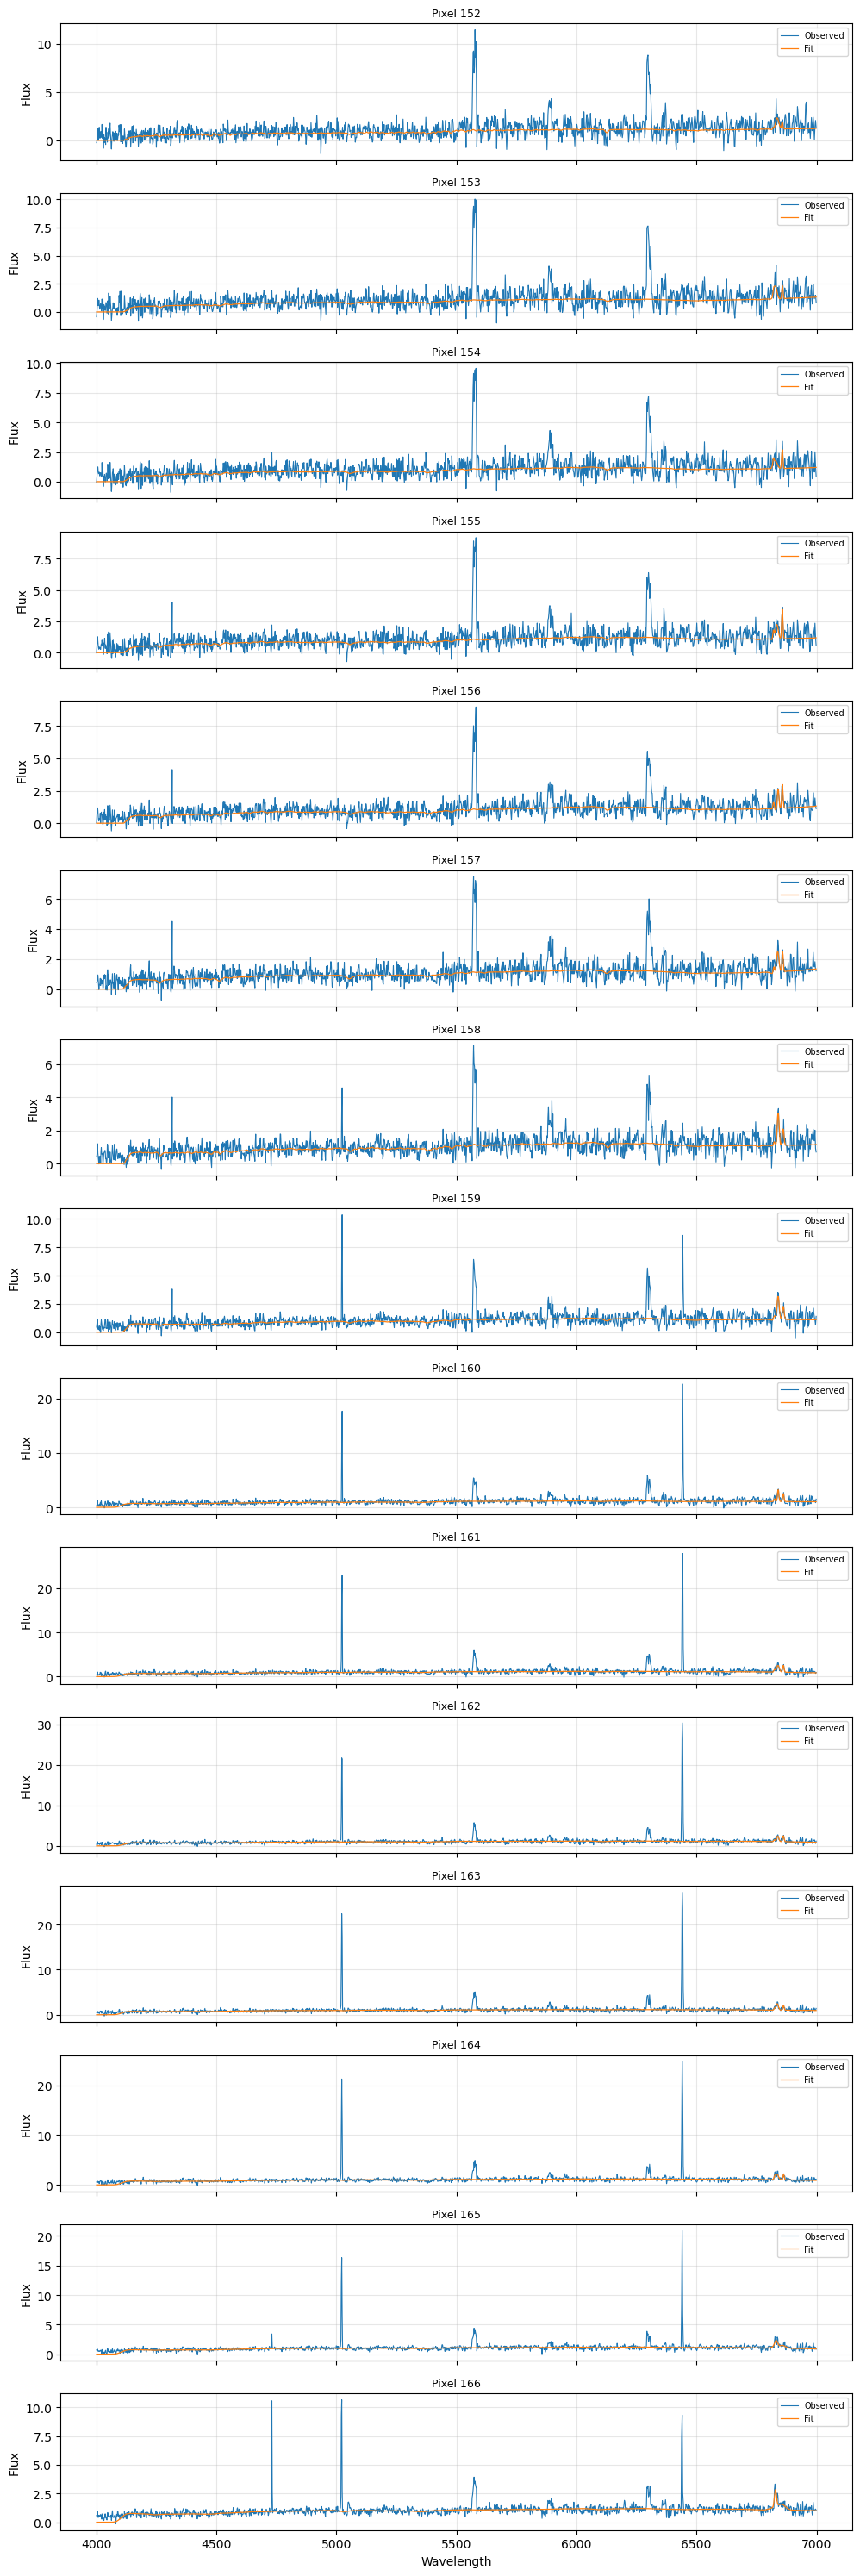

In [10]:
# choose how many and where to start
n_plot = 15
start  = 0   # change this if you want a different segment

fig, axes = plt.subplots(n_plot, 1, figsize=(10, 2*n_plot), sharex=True)

for ax, (center, df_rb, pp) in zip(axes, results[start:start+n_plot]):
    lam  = df_rb["lam"].values
    flux = df_rb["flux"].values
    fit  = pp.bestfit

    ax.plot(lam, flux, lw=0.8, label="Observed")
    ax.plot(lam, fit, lw=0.9, label="Fit")
    ax.set_ylabel("Flux")
    ax.set_title(f"Pixel {center}", fontsize=9)
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

axes[-1].set_xlabel("Wavelength")
plt.tight_layout()
plt.show()


In [11]:
waveobs = np.load("../SB3_waveobs.npy")
waveem = np.load("../SB3_waveem.npy")

In [12]:
print(waveobs)

[7189.80657094 7187.93461073 7186.06265052 ... 3451.50203102 3449.63007081
 3447.7581106 ]


In [13]:
print(waveem)

[6905.40243407 6903.6045222  6901.80661033 ... 3314.97242534 3313.17451347
 3311.3766016 ]


In [14]:
6550+200

6750